In [7]:
import numpy as np
import tensorflow as tf
import pickle5 as pickle
from matplotlib import pyplot as plt
import random
#necessary imports

In [8]:
#load datasets and labels
all_data = pickle.load(open('D:/magistratura/magistratura/MO/lab4/SVHN_multi_crop_normalized_32.pickle', 'rb'))
train_data = all_data['train_dataset']
test_data = all_data['test_dataset']
valid_data = all_data['valid_dataset']

train_labels = all_data['train_labels']
test_labels = all_data['test_labels']
valid_labels = all_data['valid_labels']

del all_data

In [9]:
#delete invalid data
train_labels = np.delete(train_labels, 19623, axis=0)
train_data = np.delete(train_data, 19623, axis=0)

In [10]:
#one hot representaton for train labels
dataSize = train_labels.shape[0]
onehotLabels1 = np.zeros((dataSize, 7))
onehotLabels2 = np.zeros((dataSize, 10))
onehotLabels3 = np.zeros((dataSize, 10))
onehotLabels4 = np.zeros((dataSize, 10))
onehotLabels5 = np.zeros((dataSize, 10))
onehotLabels6 = np.zeros((dataSize, 10))

for i in range(dataSize):
    labels = train_labels[i]
    num_of_digits = labels[0]
    onehotLabels1[i, num_of_digits] = 1
    counter = 0
    if counter < num_of_digits:
        onehotLabels2[i, labels[1] % 10] = 1
    if counter < num_of_digits:
        onehotLabels3[i, labels[2] % 10] = 1
    if counter < num_of_digits:
        onehotLabels4[i, labels[3] % 10] = 1
    if counter < num_of_digits:
        onehotLabels5[i, labels[4] % 10] = 1
    if counter < num_of_digits:
        onehotLabels6[i, labels[5] % 10] = 1
        
trainOneHotLabels = [onehotLabels1, onehotLabels2, onehotLabels3, onehotLabels4, onehotLabels5, onehotLabels6]

In [11]:
#one hot representaton for test labels
dataSize = test_labels.shape[0]
onehotLabels1 = np.zeros((dataSize, 7))
onehotLabels2 = np.zeros((dataSize, 10))
onehotLabels3 = np.zeros((dataSize, 10))
onehotLabels4 = np.zeros((dataSize, 10))
onehotLabels5 = np.zeros((dataSize, 10))
onehotLabels6 = np.zeros((dataSize, 10))

for i in range(dataSize):
    labels = test_labels[i]
    num_of_digits = labels[0]
    onehotLabels1[i, num_of_digits] = 1
    counter = 0
    if counter < num_of_digits:
        onehotLabels2[i, labels[1] % 10] = 1
    if counter < num_of_digits:
        onehotLabels3[i, labels[2] % 10] = 1
    if counter < num_of_digits:
        onehotLabels4[i, labels[3] % 10] = 1
    if counter < num_of_digits:
        onehotLabels5[i, labels[4] % 10] = 1
    if counter < num_of_digits:
        onehotLabels6[i, labels[5] % 10] = 1
        
testOneHotLabels = [onehotLabels1, onehotLabels2, onehotLabels3, onehotLabels4, onehotLabels5, onehotLabels6]

In [12]:
#one hot representaton for validation labels
dataSize = valid_labels.shape[0]
onehotLabels1 = np.zeros((dataSize, 7))
onehotLabels2 = np.zeros((dataSize, 10))
onehotLabels3 = np.zeros((dataSize, 10))
onehotLabels4 = np.zeros((dataSize, 10))
onehotLabels5 = np.zeros((dataSize, 10))
onehotLabels6 = np.zeros((dataSize, 10))

for i in range(dataSize):
    labels = valid_labels[i]
    num_of_digits = labels[0]
    onehotLabels1[i, num_of_digits] = 1
    counter = 0
    if counter < num_of_digits:
        onehotLabels2[i, labels[1] % 10] = 1
    if counter < num_of_digits:
        onehotLabels3[i, labels[2] % 10] = 1
    if counter < num_of_digits:
        onehotLabels4[i, labels[3] % 10] = 1
    if counter < num_of_digits:
        onehotLabels5[i, labels[4] % 10] = 1
    if counter < num_of_digits:
        onehotLabels6[i, labels[5] % 10] = 1

validOneHotLabels = [onehotLabels1, onehotLabels2, onehotLabels3, onehotLabels4, onehotLabels5, onehotLabels6]

In [13]:
#for grayscale images
num_channels = 1  

image_size = 32
pixel_depth = 255.0

In [14]:
#reshape from (183400, 32, 32) to (183400, 32, 32, 1)
train_data = train_data.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
test_data = test_data.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
valid_data = valid_data.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)

In [15]:
print('train_data shape is : %s' % (train_data.shape,))
print('test_data shape is : %s' % (test_data.shape,))
print('valid_data shape is : %s' % (valid_data.shape,))

print('train_labels shape is : %s' % (train_labels.shape,))
print('test_labels shape is : %s' % (test_labels.shape,))
print('valid_labels shape is : %s' % (valid_labels.shape,))

test_size = test_data.shape[0]
validation_size = valid_data.shape[0]
train_size = train_data.shape[0]

train_data shape is : (183400, 32, 32, 1)
test_data shape is : (63067, 32, 32, 1)
valid_data shape is : (2353, 32, 32, 1)
train_labels shape is : (183400, 6)
test_labels shape is : (63067, 6)
valid_labels shape is : (2353, 6)


In [16]:
# number of digits + classifier for every one of 5 digits
num_classifiers = 6 

In [17]:
# labels length of the first classifier which is the number of digits
num_digits_labels = 7

# labels length for the digit classifier
digits_labels = 10      

# number of training images in a single iteration
batch_size = 64         

# used to calculate test predictions over many iterations to avoid memory issues
test_batch_size = 457   

# convolution filter size
patch_size = 5          

# number of filters in first convolution layer
depth1 = 16             

# number of filters in second convolution layer
depth2 = 32             

# number of filters in third convolution layer
depth3 = 64             

# the size of the unrolled vector after convolution
num_hidden1 = 1024      

# the size of the hidden neurons in fully connected layer
num_hidden2 = 512       

# the size of the hidden neurons in fully connected layer
num_hidden3 = 256       

In [18]:
#graph of model
graph = tf.Graph()

In [19]:
with graph.as_default():
    # input data
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))

    #labels for every classifier
    tf_train_labels_c1 = tf.placeholder(tf.float32, shape=(batch_size, num_digits_labels))
    tf_train_labels_c2 = tf.placeholder(tf.float32, shape=(batch_size, digits_labels))
    tf_train_labels_c3 = tf.placeholder(tf.float32, shape=(batch_size, digits_labels))
    tf_train_labels_c4 = tf.placeholder(tf.float32, shape=(batch_size, digits_labels))
    tf_train_labels_c5 = tf.placeholder(tf.float32, shape=(batch_size, digits_labels))
    tf_train_labels_c6 = tf.placeholder(tf.float32, shape=(batch_size, digits_labels))

    tf_train_labels = [tf_train_labels_c1,
                       tf_train_labels_c2,
                       tf_train_labels_c3,
                       tf_train_labels_c4,
                       tf_train_labels_c5,
                       tf_train_labels_c6]
    #test data
    tf_test_dataset = tf.placeholder(tf.float32, shape=(test_batch_size, image_size, image_size, num_channels))
    
    #validation data
    tf_validation_dataset = tf.constant(valid_data)

    #to take one image and classify it (used in android)
    tf_one_input = tf.placeholder(tf.float32, shape=(1, image_size, image_size, num_channels),name='one_input_placeholder')
    
    # variables
    
    #                                                       5*5*1*16 
    conv1_weights = tf.get_variable('conv1_weights', shape=[patch_size, patch_size, num_channels, depth1],
                               initializer=tf.contrib.layers.xavier_initializer_conv2d())
    conv1_biases = tf.Variable(tf.constant(1.0, shape=[depth1]))
    
     #                                                      5*5*16*32 
    conv2_weights = tf.get_variable('conv2_weights', shape=[patch_size, patch_size, depth1, depth2],
                               initializer=tf.contrib.layers.xavier_initializer_conv2d())
    conv2_biases = tf.Variable(tf.constant(1.0, shape=[depth2]))
    
    #                                                      5*5*32*64
    conv3_weights = tf.get_variable('conv3_weights', shape=[patch_size, patch_size, depth2, depth3],
                               initializer=tf.contrib.layers.xavier_initializer_conv2d())
    conv3_biases = tf.Variable(tf.constant(1.0, shape=[depth3]))

    # number of digits classifier
    
    #                                                                 1024*512
    hidden1_weights_c1 = tf.get_variable('hidden1_weights_c1', shape=[num_hidden1, num_hidden2],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden1_biases_c1 = tf.Variable(tf.constant(1.0, shape=[num_hidden2]))
    
    #                                                                 512*256
    hidden2_weights_c1 = tf.get_variable('hidden2_weights_c1', shape=[num_hidden2, num_hidden3],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden2_biases_c1 = tf.Variable(tf.constant(1.0, shape=[num_hidden3]))
    
    #                                                                 256*7
    hidden3_weights_c1 = tf.get_variable('hidden3_weights_c1', shape=[num_hidden3, num_digits_labels],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden3_biases_c1 = tf.Variable(tf.constant(1.0, shape=[num_digits_labels]))

    # first number classifier
    
    #                                                                 1024*512
    hidden1_weights_c2 = tf.get_variable('hidden1_weights_c2', shape=[num_hidden1, num_hidden2],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden1_biases_c2 = tf.Variable(tf.constant(1.0, shape=[num_hidden2]))

    #                                                                 512*256
    hidden2_weights_c2 = tf.get_variable('hidden2_weights_c2', shape=[num_hidden2, num_hidden3],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden2_biases_c2 = tf.Variable(tf.constant(1.0, shape=[num_hidden3]))

    #                                                                 256*10
    hidden3_weights_c2 = tf.get_variable('hidden3_weights_c2', shape=[num_hidden3, digits_labels],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden3_biases_c2 = tf.Variable(tf.constant(1.0, shape=[digits_labels]))

    # second number classifier
    #                                                                 1024*512
    hidden1_weights_c3 = tf.get_variable('hidden1_weights_c3', shape=[num_hidden1, num_hidden2],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden1_biases_c3 = tf.Variable(tf.constant(1.0, shape=[num_hidden2]))

    #                                                                 512*256
    hidden2_weights_c3 = tf.get_variable('hidden2_weights_c3', shape=[num_hidden2, num_hidden3],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden2_biases_c3 = tf.Variable(tf.constant(1.0, shape=[num_hidden3]))

    #                                                                 256*10
    hidden3_weights_c3 = tf.get_variable('hidden3_weights_c3', shape=[num_hidden3, digits_labels],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden3_biases_c3 = tf.Variable(tf.constant(1.0, shape=[digits_labels]))

    # third number classifier
    #                                                                 1024*512
    hidden1_weights_c4 = tf.get_variable('hidden1_weights_c4', shape=[num_hidden1, num_hidden2],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden1_biases_c4 = tf.Variable(tf.constant(1.0, shape=[num_hidden2]))

    #                                                                 512*256
    hidden2_weights_c4 = tf.get_variable('hidden2_weights_c4', shape=[num_hidden2, num_hidden3],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden2_biases_c4 = tf.Variable(tf.constant(1.0, shape=[num_hidden3]))

    #                                                                 256*10
    hidden3_weights_c4 = tf.get_variable('hidden3_weights_c4', shape=[num_hidden3, digits_labels],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden3_biases_c4 = tf.Variable(tf.constant(1.0, shape=[digits_labels]))

    # fourth number classifier
    #                                                                 1024*512
    hidden1_weights_c5 = tf.get_variable('hidden1_weights_c5', shape=[num_hidden1, num_hidden2],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden1_biases_c5 = tf.Variable(tf.constant(1.0, shape=[num_hidden2]))

    #                                                                 512*256
    hidden2_weights_c5 = tf.get_variable('hidden2_weights_c5', shape=[num_hidden2, num_hidden3],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden2_biases_c5 = tf.Variable(tf.constant(1.0, shape=[num_hidden3]))

    #                                                                 256*10
    hidden3_weights_c5 = tf.get_variable('hidden3_weights_c5', shape=[num_hidden3, digits_labels],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden3_biases_c5 = tf.Variable(tf.constant(1.0, shape=[digits_labels]))

    # fifth number classifier
    #                                                                 1024*512
    hidden1_weights_c6 = tf.get_variable('hidden1_weights_c6', shape=[num_hidden1, num_hidden2],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden1_biases_c6 = tf.Variable(tf.constant(1.0, shape=[num_hidden2]))

    #                                                                 512*256
    hidden2_weights_c6 = tf.get_variable('hidden2_weights_c6', shape=[num_hidden2, num_hidden3],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden2_biases_c6 = tf.Variable(tf.constant(1.0, shape=[num_hidden3]))

    #                                                                 256*10
    hidden3_weights_c6 = tf.get_variable('hidden3_weights_c6', shape=[num_hidden3, digits_labels],
                                  initializer=tf.contrib.layers.xavier_initializer())
    hidden3_biases_c6 = tf.Variable(tf.constant(1.0, shape=[digits_labels]))
    
    
    
    
    # first conv bloc
    conv = tf.nn.conv2d(tf_train_dataset, conv1_weights, [1, 1, 1, 1], padding='SAME')
    conv = tf.nn.max_pool(value=conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.local_response_normalization(conv)
    hidden = tf.nn.relu(conv + conv1_biases)
    
    
    # second conv block
    conv = tf.nn.conv2d(hidden, conv2_weights, [1, 1, 1, 1], padding='SAME')
    conv = tf.nn.max_pool(value=conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.local_response_normalization(conv)
    hidden = tf.nn.relu(conv + conv2_biases)
    
    

    # third conv block
    conv = tf.nn.conv2d(hidden, conv3_weights, [1, 1, 1, 1], padding='SAME')
    conv = tf.nn.max_pool(value=conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.local_response_normalization(conv)
    hidden = tf.nn.relu(conv + conv3_biases)
    
    
    

    #flatten
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])

    # first classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c1) + hidden1_biases_c1)
    hidden = tf.nn.dropout(hidden, 0.7)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c1) + hidden2_biases_c1)
    hidden = tf.nn.dropout(hidden, 0.7)
    logits1 = tf.matmul(hidden, hidden3_weights_c1) + hidden3_biases_c1

    # second classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c2) + hidden1_biases_c2)
    hidden = tf.nn.dropout(hidden, 0.7)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c2) + hidden2_biases_c2)
    hidden = tf.nn.dropout(hidden, 0.7)
    logits2 = tf.matmul(hidden, hidden3_weights_c2) + hidden3_biases_c2


    # third classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c3) + hidden1_biases_c3)
    hidden = tf.nn.dropout(hidden, 0.7)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c3) + hidden2_biases_c3)
    hidden = tf.nn.dropout(hidden, 0.7)
    logits3 = tf.matmul(hidden, hidden3_weights_c3) + hidden3_biases_c3

    # fourth classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c4) + hidden1_biases_c4)
    hidden = tf.nn.dropout(hidden, 0.7)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c4) + hidden2_biases_c4)
    hidden = tf.nn.dropout(hidden, 0.7)
    logits4 = tf.matmul(hidden, hidden3_weights_c4) + hidden3_biases_c4
    

    # fifth classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c5) + hidden1_biases_c5)
    hidden = tf.nn.dropout(hidden, 0.7)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c5) + hidden2_biases_c5)
    hidden = tf.nn.dropout(hidden, 0.7)
    logits5 = tf.matmul(hidden, hidden3_weights_c5) + hidden3_biases_c5

    # sixth classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c6) + hidden1_biases_c6)
    hidden = tf.nn.dropout(hidden, 0.7)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c6) + hidden2_biases_c6)
    hidden = tf.nn.dropout(hidden, 0.7)
    logits6 = tf.matmul(hidden, hidden3_weights_c6) + hidden3_biases_c6
    
    logits = [logits1, logits2, logits3, logits4, logits5, logits6]
    
    
    #sum loss of all classifiers
    loss = 0.0
    for i in range(num_classifiers):
        loss = loss + tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels[i], logits=logits[i]))  
    
    #run step
    global_step = tf.Variable(0)
    
    #learning rate with decay
    learning_rate = tf.train.exponential_decay(0.001, global_step, 20000, 0.90, staircase=True)  
    
    # optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    
    #backprop
    tvars = tf.trainable_variables()
    grads, _ = tf.clip_by_global_norm(tf.gradients(loss, tvars), 1.0) 
    optimize = optimizer.apply_gradients(zip(grads, tvars),global_step=global_step)
    
    
    # predictions for training data
    prediction_c1 = tf.nn.softmax(logits[0])
    prediction_c2 = tf.nn.softmax(logits[1])
    prediction_c3 = tf.nn.softmax(logits[2])
    prediction_c4 = tf.nn.softmax(logits[3])
    prediction_c5 = tf.nn.softmax(logits[4])
    prediction_c6 = tf.nn.softmax(logits[5])
    
    
    
    train_prediction_c1 = prediction_c1
    train_prediction_c2 = prediction_c2
    train_prediction_c3 = prediction_c3
    train_prediction_c4 = prediction_c4
    train_prediction_c5 = prediction_c5
    train_prediction_c6 = prediction_c6
    
    
    
    
    
    
    
    
    # first conv bloc
    conv = tf.nn.conv2d(tf_validation_dataset, conv1_weights, [1, 1, 1, 1], padding='SAME')
    conv = tf.nn.max_pool(value=conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.local_response_normalization(conv)
    hidden = tf.nn.relu(conv + conv1_biases)
    
    
    # second conv block
    conv = tf.nn.conv2d(hidden, conv2_weights, [1, 1, 1, 1], padding='SAME')
    conv = tf.nn.max_pool(value=conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.local_response_normalization(conv)
    hidden = tf.nn.relu(conv + conv2_biases)
    
    

    # third conv block
    conv = tf.nn.conv2d(hidden, conv3_weights, [1, 1, 1, 1], padding='SAME')
    conv = tf.nn.max_pool(value=conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.local_response_normalization(conv)
    hidden = tf.nn.relu(conv + conv3_biases)
    
    
    

    #flatten
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])

    # first classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c1) + hidden1_biases_c1)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c1) + hidden2_biases_c1)
    logits1 = tf.matmul(hidden, hidden3_weights_c1) + hidden3_biases_c1

    # second classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c2) + hidden1_biases_c2)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c2) + hidden2_biases_c2)
    logits2 = tf.matmul(hidden, hidden3_weights_c2) + hidden3_biases_c2


    # third classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c3) + hidden1_biases_c3)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c3) + hidden2_biases_c3)
    logits3 = tf.matmul(hidden, hidden3_weights_c3) + hidden3_biases_c3

    # fourth classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c4) + hidden1_biases_c4)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c4) + hidden2_biases_c4)
    logits4 = tf.matmul(hidden, hidden3_weights_c4) + hidden3_biases_c4
    

    # fifth classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c5) + hidden1_biases_c5)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c5) + hidden2_biases_c5)
    logits5 = tf.matmul(hidden, hidden3_weights_c5) + hidden3_biases_c5

    # sixth classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c6) + hidden1_biases_c6)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c6) + hidden2_biases_c6)
    logits6 = tf.matmul(hidden, hidden3_weights_c6) + hidden3_biases_c6
    
    logits = [logits1, logits2, logits3, logits4, logits5, logits6]
    
    
    # predictions for validation data
    prediction_c1 = tf.nn.softmax(logits[0])
    prediction_c2 = tf.nn.softmax(logits[1])
    prediction_c3 = tf.nn.softmax(logits[2])
    prediction_c4 = tf.nn.softmax(logits[3])
    prediction_c5 = tf.nn.softmax(logits[4])
    prediction_c6 = tf.nn.softmax(logits[5])
    
    valid_prediction_c1 = prediction_c1
    valid_prediction_c2 = prediction_c2
    valid_prediction_c3 = prediction_c3
    valid_prediction_c4 = prediction_c4
    valid_prediction_c5 = prediction_c5
    valid_prediction_c6 = prediction_c6
    
    
    
    
    
    
    
    
    # first conv bloc
    conv = tf.nn.conv2d(tf_test_dataset, conv1_weights, [1, 1, 1, 1], padding='SAME')
    conv = tf.nn.max_pool(value=conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.local_response_normalization(conv)
    hidden = tf.nn.relu(conv + conv1_biases)
    
    
    # second conv block
    conv = tf.nn.conv2d(hidden, conv2_weights, [1, 1, 1, 1], padding='SAME')
    conv = tf.nn.max_pool(value=conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.local_response_normalization(conv)
    hidden = tf.nn.relu(conv + conv2_biases)
    
    

    # third conv block
    conv = tf.nn.conv2d(hidden, conv3_weights, [1, 1, 1, 1], padding='SAME')
    conv = tf.nn.max_pool(value=conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.local_response_normalization(conv)
    hidden = tf.nn.relu(conv + conv3_biases)
    
    
    

    #flatten
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])

    # first classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c1) + hidden1_biases_c1)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c1) + hidden2_biases_c1)
    logits1 = tf.matmul(hidden, hidden3_weights_c1) + hidden3_biases_c1

    # second classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c2) + hidden1_biases_c2)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c2) + hidden2_biases_c2)
    logits2 = tf.matmul(hidden, hidden3_weights_c2) + hidden3_biases_c2


    # third classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c3) + hidden1_biases_c3)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c3) + hidden2_biases_c3)
    logits3 = tf.matmul(hidden, hidden3_weights_c3) + hidden3_biases_c3

    # fourth classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c4) + hidden1_biases_c4)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c4) + hidden2_biases_c4)
    logits4 = tf.matmul(hidden, hidden3_weights_c4) + hidden3_biases_c4
    

    # fifth classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c5) + hidden1_biases_c5)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c5) + hidden2_biases_c5)
    logits5 = tf.matmul(hidden, hidden3_weights_c5) + hidden3_biases_c5

    # sixth classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c6) + hidden1_biases_c6)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c6) + hidden2_biases_c6)
    logits6 = tf.matmul(hidden, hidden3_weights_c6) + hidden3_biases_c6
    
    logits = [logits1, logits2, logits3, logits4, logits5, logits6]
    
    
    # predictions for test data
    prediction_c1 = tf.nn.softmax(logits[0])
    prediction_c2 = tf.nn.softmax(logits[1])
    prediction_c3 = tf.nn.softmax(logits[2])
    prediction_c4 = tf.nn.softmax(logits[3])
    prediction_c5 = tf.nn.softmax(logits[4])
    prediction_c6 = tf.nn.softmax(logits[5])
    
    test_prediction_c1 = prediction_c1
    test_prediction_c2 = prediction_c2
    test_prediction_c3 = prediction_c3
    test_prediction_c4 = prediction_c4
    test_prediction_c5 = prediction_c5
    test_prediction_c6 = prediction_c6
    
    
    
    
    
    # first conv bloc
    conv = tf.nn.conv2d(tf_one_input, conv1_weights, [1, 1, 1, 1], padding='SAME')
    conv = tf.nn.max_pool(value=conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.local_response_normalization(conv)
    hidden = tf.nn.relu(conv + conv1_biases)
    
    
    # second conv block
    conv = tf.nn.conv2d(hidden, conv2_weights, [1, 1, 1, 1], padding='SAME')
    conv = tf.nn.max_pool(value=conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.local_response_normalization(conv)
    hidden = tf.nn.relu(conv + conv2_biases)
    
    

    # third conv block
    conv = tf.nn.conv2d(hidden, conv3_weights, [1, 1, 1, 1], padding='SAME')
    conv = tf.nn.max_pool(value=conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv = tf.nn.local_response_normalization(conv)
    hidden = tf.nn.relu(conv + conv3_biases)
    
    
    

    #flatten
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])

    # first classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c1) + hidden1_biases_c1)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c1) + hidden2_biases_c1)
    logits1 = tf.matmul(hidden, hidden3_weights_c1) + hidden3_biases_c1

    # second classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c2) + hidden1_biases_c2)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c2) + hidden2_biases_c2)
    logits2 = tf.matmul(hidden, hidden3_weights_c2) + hidden3_biases_c2


    # third classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c3) + hidden1_biases_c3)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c3) + hidden2_biases_c3)
    logits3 = tf.matmul(hidden, hidden3_weights_c3) + hidden3_biases_c3

    # fourth classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c4) + hidden1_biases_c4)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c4) + hidden2_biases_c4)
    logits4 = tf.matmul(hidden, hidden3_weights_c4) + hidden3_biases_c4
    

    # fifth classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c5) + hidden1_biases_c5)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c5) + hidden2_biases_c5)
    logits5 = tf.matmul(hidden, hidden3_weights_c5) + hidden3_biases_c5

    # sixth classifier
    hidden = tf.nn.relu(tf.matmul(reshape, hidden1_weights_c6) + hidden1_biases_c6)
    hidden = tf.nn.relu(tf.matmul(hidden, hidden2_weights_c6) + hidden2_biases_c6)
    logits6 = tf.matmul(hidden, hidden3_weights_c6) + hidden3_biases_c6
    
    logits = [logits1, logits2, logits3, logits4, logits5, logits6]
    
    
    # predictions for android input data.
    prediction_c1 = tf.nn.softmax(logits[0])
    prediction_c2 = tf.nn.softmax(logits[1])
    prediction_c3 = tf.nn.softmax(logits[2])
    prediction_c4 = tf.nn.softmax(logits[3])
    prediction_c5 = tf.nn.softmax(logits[4])
    prediction_c6 = tf.nn.softmax(logits[5])
    
    one_prediction_c1 = prediction_c1
    one_prediction_c2 = prediction_c2
    one_prediction_c3 = prediction_c3
    one_prediction_c4 = prediction_c4
    one_prediction_c5 = prediction_c5
    one_prediction_c6 = prediction_c6
    
    one_prediction_c1, one_prediction_c2, one_prediction_c3, one_prediction_c4, one_prediction_c5, one_prediction_c6 = tf.identity(one_prediction_c1, name="one_prediction_c1"),tf.identity(one_prediction_c2, name="one_prediction_c2"),tf.identity(one_prediction_c3, name="one_prediction_c3"),tf.identity(one_prediction_c4, name="one_prediction_c4"),tf.identity(one_prediction_c5, name="one_prediction_c5"),tf.identity(one_prediction_c6, name="one_prediction_c6")
    

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [20]:
num_steps = 200001   #number of training iterations


#used for drawing error and accuracy over time
training_loss = []
training_loss_epoch = []

train_accuracy = []
train_accuracy_epoch = []

valid_accuracy = []
valid_accuracy_epoch = []

test_prediction = []

test_accuracy=0

In [21]:
with tf.Session(graph=graph, config=tf.ConfigProto(log_device_placement=True)) as session:
    tf.global_variables_initializer().run()
    saver = tf.train.Saver().
    writer = tf.summary.FileWriter('D:/magistratura/magistratura/MO/lab4/graph_info', session.graph)

    print('Initialized')
    for step in range(num_steps):
        #take batch data
        batch_size = 64 
        offset = (step * batch_size) % (train_size - batch_size)
        batch_data = train_data[offset:(offset + batch_size), :, :, :]
        batch_labels = []
        for i in range(num_classifiers):
            batch_labels.append(trainOneHotLabels[i][offset:(offset + batch_size), :])
            
        #create feed dict with batch data and batch labels
        feed_dict = {tf_train_dataset: batch_data, tf_train_labels_c1: batch_labels[0],
                     tf_train_labels_c2: batch_labels[1], tf_train_labels_c3: batch_labels[2],
                     tf_train_labels_c4: batch_labels[3], tf_train_labels_c5: batch_labels[4],
                     tf_train_labels_c6: batch_labels[5]}
        
        #run adam optimizer with optimize function
        _, l, c1, c2, c3, c4, c5, c6, lr = session.run(
            [optimize, loss, train_prediction_c1, train_prediction_c2, train_prediction_c3, train_prediction_c4,
             train_prediction_c5, train_prediction_c6, learning_rate], feed_dict=feed_dict)
        
        predictions = [c1, c2, c3, c4, c5, c6]
        
        if (step % 50 == 0):
            
            batch_size_init = predictions[0].shape[0]
            
            #create predictions as string
            batch_size = predictions[0].shape[0]
            all_labels = []
            for i in range(batch_size):
                num_digits = np.argmax(predictions[0][i])
                st = str(num_digits)
                for j in range(1, num_classifiers):
                    if (j > num_digits):
                        break
                    st = st + str(np.argmax(predictions[j][i]))
                all_labels.append(st)
            
            
            predictions = all_labels
            
            
            #create labels as string
            batch_size = batch_labels[0].shape[0]
            all_labels = []
            for i in range(batch_size):
                num_digits = np.argmax(batch_labels[0][i])
                st = str(num_digits)
                for j in range(1, num_classifiers):
                    if (j > num_digits):
                        break
                    st = st + str(np.argmax(batch_labels[j][i]))
                all_labels.append(st)

                
            labels = all_labels
            
            
            #count the number of matches and non-matches
            equalities = np.zeros(batch_size_init)
            for i in range(batch_size_init):
                if predictions[i] == labels[i]:
                    equalities[i] = 1
            sum = np.sum(equalities)
            
            #calc accuracy
            acc = (100.0 * sum) / batch_size_init
            
            
            
            print('Learning rate at step %d: %.14f' % (step, lr))
            print('Minibatch loss at step %d: %f' % (step, l))
            batch_train_accuracy = acc
            print('Minibatch accuracy: %.1f%%' % batch_train_accuracy)
            training_loss.append(l)
            training_loss_epoch.append(step)
            train_accuracy.append(batch_train_accuracy)
            train_accuracy_epoch.append(step)
            if(lr==0):   #if learning rate reaches 0 break
                break
        
        #every 500 iteration calculate validation accuracy
        if (step % 500 == 0):   
            c1, c2, c3, c4, c5, c6 = session.run(
                [valid_prediction_c1, valid_prediction_c2, valid_prediction_c3, valid_prediction_c4,
                 valid_prediction_c5, valid_prediction_c6])
            predictions = [c1, c2, c3, c4, c5, c6]
            
            batch_size_init = predictions[0].shape[0]
            
            
            batch_size = predictions[0].shape[0]
            all_labels = []
            for i in range(batch_size):
                num_digits = np.argmax(predictions[0][i])
                st = str(num_digits)
                for j in range(1, num_classifiers):
                    if (j > num_digits):
                        break
                    st = st + str(np.argmax(predictions[j][i]))
                all_labels.append(st)
            
            
            predictions = all_labels
            
            
        
            batch_size = validOneHotLabels[0].shape[0]
            all_labels = []
            for i in range(batch_size):
                num_digits = np.argmax(validOneHotLabels[0][i])
                st = str(num_digits)
                for j in range(1, num_classifiers):
                    if (j > num_digits):
                        break
                    st = st + str(np.argmax(validOneHotLabels[j][i]))
                all_labels.append(st)

                
            labels = all_labels
            
            
            equalities = np.zeros(batch_size_init)
            for i in range(batch_size_init):
                if predictions[i] == labels[i]:
                    equalities[i] = 1
            sum = np.sum(equalities)
            acc = (100.0 * sum) / batch_size_init
            
            
            validation_accuracy = acc
            print('validation accuracy: %.1f%%' % validation_accuracy)
            valid_accuracy.append(validation_accuracy)
            valid_accuracy_epoch.append(step)

            
            
    #get test predictions in steps to avoid memory problems
    test_pred_c1 = np.zeros((test_size, num_digits_labels))
    test_pred_c2 = np.zeros((test_size, digits_labels))
    test_pred_c3 = np.zeros((test_size, digits_labels))
    test_pred_c4 = np.zeros((test_size, digits_labels))
    test_pred_c5 = np.zeros((test_size, digits_labels))
    test_pred_c6 = np.zeros((test_size, digits_labels))

    for step in range(int(test_size / test_batch_size)):
        offset = (step * test_batch_size) % (test_size - test_batch_size)
        batch_data = test_data[offset:(offset + test_batch_size), :, :, :]
        feed_dict = {tf_test_dataset: batch_data}
        c1, c2, c3, c4, c5, c6 = session.run(
            [test_prediction_c1, test_prediction_c2, test_prediction_c3, test_prediction_c4, test_prediction_c5,
             test_prediction_c6], feed_dict=feed_dict)

        test_pred_c1[offset:offset + test_batch_size] = c1
        test_pred_c2[offset:offset + test_batch_size] = c2
        test_pred_c3[offset:offset + test_batch_size] = c3
        test_pred_c4[offset:offset + test_batch_size] = c4
        test_pred_c5[offset:offset + test_batch_size] = c5
        test_pred_c6[offset:offset + test_batch_size] = c6
        
    # calculate test accuracy
    predictions = [test_pred_c1, test_pred_c2, test_pred_c3, test_pred_c4, test_pred_c5, test_pred_c6]
    
    
    batch_size_init = predictions[0].shape[0]
    
    batch_size = predictions[0].shape[0]
    all_labels = []
    for i in range(batch_size):
        num_digits = np.argmax(predictions[0][i])
        st = str(num_digits)
        for j in range(1, num_classifiers):
            if (j > num_digits):
                break
            st = st + str(np.argmax(predictions[j][i]))
        all_labels.append(st)


    predictions = all_labels



    batch_size = testOneHotLabels[0].shape[0]
    all_labels = []
    for i in range(batch_size):
        num_digits = np.argmax(testOneHotLabels[0][i])
        st = str(num_digits)
        for j in range(1, num_classifiers):
            if (j > num_digits):
                break
            st = st + str(np.argmax(testOneHotLabels[j][i]))
        all_labels.append(st)


    labels = all_labels


    equalities = np.zeros(batch_size_init)
    for i in range(batch_size_init):
        if predictions[i] == labels[i]:
            equalities[i] = 1
    sum = np.sum(equalities)
    acc = (100.0 * sum) / batch_size_init
    
    test_accuracy = acc
    test_predictions = predictions
    writer.close()
    
    #save the model
    saver.save(session, "D:/magistratura/magistratura/MO/lab4/saved_model/model.ckpt")

Initialized
Learning rate at step 0: 0.00100000004750
Minibatch loss at step 0: 36.216850
Minibatch accuracy: 0.0%
validation accuracy: 0.3%
Learning rate at step 50: 0.00100000004750
Minibatch loss at step 50: 7.781147
Minibatch accuracy: 3.1%
Learning rate at step 100: 0.00100000004750
Minibatch loss at step 100: 6.938569
Minibatch accuracy: 0.0%
Learning rate at step 150: 0.00100000004750
Minibatch loss at step 150: 6.835230
Minibatch accuracy: 1.6%
Learning rate at step 200: 0.00100000004750
Minibatch loss at step 200: 6.701900
Minibatch accuracy: 0.0%
Learning rate at step 250: 0.00100000004750
Minibatch loss at step 250: 6.886686
Minibatch accuracy: 1.6%
Learning rate at step 300: 0.00100000004750
Minibatch loss at step 300: 7.007493
Minibatch accuracy: 0.0%
Learning rate at step 350: 0.00100000004750
Minibatch loss at step 350: 6.719604
Minibatch accuracy: 1.6%
Learning rate at step 400: 0.00100000004750
Minibatch loss at step 400: 6.741855
Minibatch accuracy: 0.0%
Learning rate

Learning rate at step 3750: 0.00100000004750
Minibatch loss at step 3750: 7.150419
Minibatch accuracy: 3.1%
Learning rate at step 3800: 0.00100000004750
Minibatch loss at step 3800: 7.647744
Minibatch accuracy: 1.6%
Learning rate at step 3850: 0.00100000004750
Minibatch loss at step 3850: 7.674353
Minibatch accuracy: 0.0%
Learning rate at step 3900: 0.00100000004750
Minibatch loss at step 3900: 7.259807
Minibatch accuracy: 0.0%
Learning rate at step 3950: 0.00100000004750
Minibatch loss at step 3950: 7.579596
Minibatch accuracy: 1.6%
Learning rate at step 4000: 0.00100000004750
Minibatch loss at step 4000: 7.612290
Minibatch accuracy: 0.0%
validation accuracy: 0.2%
Learning rate at step 4050: 0.00100000004750
Minibatch loss at step 4050: 7.101030
Minibatch accuracy: 1.6%
Learning rate at step 4100: 0.00100000004750
Minibatch loss at step 4100: 7.455647
Minibatch accuracy: 0.0%
Learning rate at step 4150: 0.00100000004750
Minibatch loss at step 4150: 7.505779
Minibatch accuracy: 0.0%
Le

Learning rate at step 7500: 0.00100000004750
Minibatch loss at step 7500: 5.916779
Minibatch accuracy: 1.6%
validation accuracy: 2.2%
Learning rate at step 7550: 0.00100000004750
Minibatch loss at step 7550: 6.108604
Minibatch accuracy: 0.0%
Learning rate at step 7600: 0.00100000004750
Minibatch loss at step 7600: 6.163637
Minibatch accuracy: 0.0%
Learning rate at step 7650: 0.00100000004750
Minibatch loss at step 7650: 5.726625
Minibatch accuracy: 0.0%
Learning rate at step 7700: 0.00100000004750
Minibatch loss at step 7700: 5.389808
Minibatch accuracy: 4.7%
Learning rate at step 7750: 0.00100000004750
Minibatch loss at step 7750: 5.527652
Minibatch accuracy: 1.6%
Learning rate at step 7800: 0.00100000004750
Minibatch loss at step 7800: 5.413193
Minibatch accuracy: 4.7%
Learning rate at step 7850: 0.00100000004750
Minibatch loss at step 7850: 5.624057
Minibatch accuracy: 3.1%
Learning rate at step 7900: 0.00100000004750
Minibatch loss at step 7900: 5.474684
Minibatch accuracy: 4.7%
Le

Learning rate at step 11150: 0.00100000004750
Minibatch loss at step 11150: 2.705787
Minibatch accuracy: 50.0%
Learning rate at step 11200: 0.00100000004750
Minibatch loss at step 11200: 1.941764
Minibatch accuracy: 57.8%
Learning rate at step 11250: 0.00100000004750
Minibatch loss at step 11250: 1.468920
Minibatch accuracy: 62.5%
Learning rate at step 11300: 0.00100000004750
Minibatch loss at step 11300: 2.329492
Minibatch accuracy: 53.1%
Learning rate at step 11350: 0.00100000004750
Minibatch loss at step 11350: 2.063773
Minibatch accuracy: 60.9%
Learning rate at step 11400: 0.00100000004750
Minibatch loss at step 11400: 1.219041
Minibatch accuracy: 68.8%
Learning rate at step 11450: 0.00100000004750
Minibatch loss at step 11450: 2.403554
Minibatch accuracy: 51.6%
Learning rate at step 11500: 0.00100000004750
Minibatch loss at step 11500: 1.777387
Minibatch accuracy: 59.4%
validation accuracy: 68.0%
Learning rate at step 11550: 0.00100000004750
Minibatch loss at step 11550: 2.054284


Learning rate at step 14800: 0.00100000004750
Minibatch loss at step 14800: 1.541250
Minibatch accuracy: 68.8%
Learning rate at step 14850: 0.00100000004750
Minibatch loss at step 14850: 1.163884
Minibatch accuracy: 68.8%
Learning rate at step 14900: 0.00100000004750
Minibatch loss at step 14900: 1.909810
Minibatch accuracy: 60.9%
Learning rate at step 14950: 0.00100000004750
Minibatch loss at step 14950: 1.310689
Minibatch accuracy: 71.9%
Learning rate at step 15000: 0.00100000004750
Minibatch loss at step 15000: 0.715025
Minibatch accuracy: 82.8%
validation accuracy: 76.2%
Learning rate at step 15050: 0.00100000004750
Minibatch loss at step 15050: 1.092415
Minibatch accuracy: 67.2%
Learning rate at step 15100: 0.00100000004750
Minibatch loss at step 15100: 0.940393
Minibatch accuracy: 76.6%
Learning rate at step 15150: 0.00100000004750
Minibatch loss at step 15150: 1.135357
Minibatch accuracy: 73.4%
Learning rate at step 15200: 0.00100000004750
Minibatch loss at step 15200: 1.070532


Learning rate at step 18450: 0.00100000004750
Minibatch loss at step 18450: 0.809168
Minibatch accuracy: 84.4%
Learning rate at step 18500: 0.00100000004750
Minibatch loss at step 18500: 0.521139
Minibatch accuracy: 84.4%
validation accuracy: 82.2%
Learning rate at step 18550: 0.00100000004750
Minibatch loss at step 18550: 0.692658
Minibatch accuracy: 81.2%
Learning rate at step 18600: 0.00100000004750
Minibatch loss at step 18600: 1.054101
Minibatch accuracy: 70.3%
Learning rate at step 18650: 0.00100000004750
Minibatch loss at step 18650: 0.348534
Minibatch accuracy: 89.1%
Learning rate at step 18700: 0.00100000004750
Minibatch loss at step 18700: 0.785688
Minibatch accuracy: 78.1%
Learning rate at step 18750: 0.00100000004750
Minibatch loss at step 18750: 0.657283
Minibatch accuracy: 79.7%
Learning rate at step 18800: 0.00100000004750
Minibatch loss at step 18800: 1.118273
Minibatch accuracy: 73.4%
Learning rate at step 18850: 0.00100000004750
Minibatch loss at step 18850: 0.938361


Learning rate at step 22050: 0.00090000004275
Minibatch loss at step 22050: 1.617312
Minibatch accuracy: 75.0%
Learning rate at step 22100: 0.00090000004275
Minibatch loss at step 22100: 0.452940
Minibatch accuracy: 82.8%
Learning rate at step 22150: 0.00090000004275
Minibatch loss at step 22150: 0.384307
Minibatch accuracy: 93.8%
Learning rate at step 22200: 0.00090000004275
Minibatch loss at step 22200: 0.601068
Minibatch accuracy: 81.2%
Learning rate at step 22250: 0.00090000004275
Minibatch loss at step 22250: 0.597205
Minibatch accuracy: 84.4%
Learning rate at step 22300: 0.00090000004275
Minibatch loss at step 22300: 0.633422
Minibatch accuracy: 84.4%
Learning rate at step 22350: 0.00090000004275
Minibatch loss at step 22350: 0.565217
Minibatch accuracy: 82.8%
Learning rate at step 22400: 0.00090000004275
Minibatch loss at step 22400: 0.492881
Minibatch accuracy: 87.5%
Learning rate at step 22450: 0.00090000004275
Minibatch loss at step 22450: 0.432630
Minibatch accuracy: 89.1%
L

Learning rate at step 25700: 0.00090000004275
Minibatch loss at step 25700: 0.359737
Minibatch accuracy: 89.1%
Learning rate at step 25750: 0.00090000004275
Minibatch loss at step 25750: 0.846277
Minibatch accuracy: 82.8%
Learning rate at step 25800: 0.00090000004275
Minibatch loss at step 25800: 0.808570
Minibatch accuracy: 81.2%
Learning rate at step 25850: 0.00090000004275
Minibatch loss at step 25850: 1.171904
Minibatch accuracy: 81.2%
Learning rate at step 25900: 0.00090000004275
Minibatch loss at step 25900: 1.071466
Minibatch accuracy: 78.1%
Learning rate at step 25950: 0.00090000004275
Minibatch loss at step 25950: 1.041431
Minibatch accuracy: 78.1%
Learning rate at step 26000: 0.00090000004275
Minibatch loss at step 26000: 0.714814
Minibatch accuracy: 82.8%
validation accuracy: 84.9%
Learning rate at step 26050: 0.00090000004275
Minibatch loss at step 26050: 1.327975
Minibatch accuracy: 81.2%
Learning rate at step 26100: 0.00090000004275
Minibatch loss at step 26100: 0.985991


Learning rate at step 29350: 0.00090000004275
Minibatch loss at step 29350: 0.502986
Minibatch accuracy: 89.1%
Learning rate at step 29400: 0.00090000004275
Minibatch loss at step 29400: 0.722604
Minibatch accuracy: 76.6%
Learning rate at step 29450: 0.00090000004275
Minibatch loss at step 29450: 0.441272
Minibatch accuracy: 89.1%
Learning rate at step 29500: 0.00090000004275
Minibatch loss at step 29500: 0.509532
Minibatch accuracy: 89.1%
validation accuracy: 87.1%
Learning rate at step 29550: 0.00090000004275
Minibatch loss at step 29550: 0.503283
Minibatch accuracy: 85.9%
Learning rate at step 29600: 0.00090000004275
Minibatch loss at step 29600: 0.526098
Minibatch accuracy: 87.5%
Learning rate at step 29650: 0.00090000004275
Minibatch loss at step 29650: 0.386698
Minibatch accuracy: 93.8%
Learning rate at step 29700: 0.00090000004275
Minibatch loss at step 29700: 0.505426
Minibatch accuracy: 93.8%
Learning rate at step 29750: 0.00090000004275
Minibatch loss at step 29750: 0.645744


Learning rate at step 33000: 0.00090000004275
Minibatch loss at step 33000: 0.745196
Minibatch accuracy: 81.2%
validation accuracy: 87.3%
Learning rate at step 33050: 0.00090000004275
Minibatch loss at step 33050: 0.499364
Minibatch accuracy: 84.4%
Learning rate at step 33100: 0.00090000004275
Minibatch loss at step 33100: 0.536817
Minibatch accuracy: 89.1%
Learning rate at step 33150: 0.00090000004275
Minibatch loss at step 33150: 0.408314
Minibatch accuracy: 90.6%
Learning rate at step 33200: 0.00090000004275
Minibatch loss at step 33200: 0.806414
Minibatch accuracy: 82.8%
Learning rate at step 33250: 0.00090000004275
Minibatch loss at step 33250: 0.289397
Minibatch accuracy: 93.8%
Learning rate at step 33300: 0.00090000004275
Minibatch loss at step 33300: 0.709347
Minibatch accuracy: 84.4%
Learning rate at step 33350: 0.00090000004275
Minibatch loss at step 33350: 0.596631
Minibatch accuracy: 85.9%
Learning rate at step 33400: 0.00090000004275
Minibatch loss at step 33400: 0.893881


Learning rate at step 36600: 0.00090000004275
Minibatch loss at step 36600: 0.267450
Minibatch accuracy: 93.8%
Learning rate at step 36650: 0.00090000004275
Minibatch loss at step 36650: 0.353081
Minibatch accuracy: 93.8%
Learning rate at step 36700: 0.00090000004275
Minibatch loss at step 36700: 0.440220
Minibatch accuracy: 89.1%
Learning rate at step 36750: 0.00090000004275
Minibatch loss at step 36750: 0.474343
Minibatch accuracy: 89.1%
Learning rate at step 36800: 0.00090000004275
Minibatch loss at step 36800: 0.312076
Minibatch accuracy: 87.5%
Learning rate at step 36850: 0.00090000004275
Minibatch loss at step 36850: 0.087042
Minibatch accuracy: 100.0%
Learning rate at step 36900: 0.00090000004275
Minibatch loss at step 36900: 0.267811
Minibatch accuracy: 93.8%
Learning rate at step 36950: 0.00090000004275
Minibatch loss at step 36950: 0.886138
Minibatch accuracy: 81.2%
Learning rate at step 37000: 0.00090000004275
Minibatch loss at step 37000: 0.374906
Minibatch accuracy: 90.6%


Learning rate at step 40250: 0.00080999999773
Minibatch loss at step 40250: 0.634801
Minibatch accuracy: 89.1%
Learning rate at step 40300: 0.00080999999773
Minibatch loss at step 40300: 0.653791
Minibatch accuracy: 87.5%
Learning rate at step 40350: 0.00080999999773
Minibatch loss at step 40350: 0.348403
Minibatch accuracy: 90.6%
Learning rate at step 40400: 0.00080999999773
Minibatch loss at step 40400: 0.748166
Minibatch accuracy: 90.6%
Learning rate at step 40450: 0.00080999999773
Minibatch loss at step 40450: 0.899837
Minibatch accuracy: 87.5%
Learning rate at step 40500: 0.00080999999773
Minibatch loss at step 40500: 0.852493
Minibatch accuracy: 84.4%
validation accuracy: 88.5%
Learning rate at step 40550: 0.00080999999773
Minibatch loss at step 40550: 0.496709
Minibatch accuracy: 82.8%
Learning rate at step 40600: 0.00080999999773
Minibatch loss at step 40600: 0.669402
Minibatch accuracy: 85.9%
Learning rate at step 40650: 0.00080999999773
Minibatch loss at step 40650: 0.531066


Learning rate at step 43900: 0.00080999999773
Minibatch loss at step 43900: 0.306218
Minibatch accuracy: 95.3%
Learning rate at step 43950: 0.00080999999773
Minibatch loss at step 43950: 0.204306
Minibatch accuracy: 95.3%
Learning rate at step 44000: 0.00080999999773
Minibatch loss at step 44000: 0.636759
Minibatch accuracy: 87.5%
validation accuracy: 88.9%
Learning rate at step 44050: 0.00080999999773
Minibatch loss at step 44050: 0.227855
Minibatch accuracy: 93.8%
Learning rate at step 44100: 0.00080999999773
Minibatch loss at step 44100: 0.249930
Minibatch accuracy: 89.1%
Learning rate at step 44150: 0.00080999999773
Minibatch loss at step 44150: 0.113334
Minibatch accuracy: 96.9%
Learning rate at step 44200: 0.00080999999773
Minibatch loss at step 44200: 0.278801
Minibatch accuracy: 93.8%
Learning rate at step 44250: 0.00080999999773
Minibatch loss at step 44250: 0.262541
Minibatch accuracy: 93.8%
Learning rate at step 44300: 0.00080999999773
Minibatch loss at step 44300: 0.322780


validation accuracy: 88.7%
Learning rate at step 47550: 0.00080999999773
Minibatch loss at step 47550: 0.549829
Minibatch accuracy: 85.9%
Learning rate at step 47600: 0.00080999999773
Minibatch loss at step 47600: 0.519712
Minibatch accuracy: 89.1%
Learning rate at step 47650: 0.00080999999773
Minibatch loss at step 47650: 0.210158
Minibatch accuracy: 95.3%
Learning rate at step 47700: 0.00080999999773
Minibatch loss at step 47700: 0.254065
Minibatch accuracy: 90.6%
Learning rate at step 47750: 0.00080999999773
Minibatch loss at step 47750: 0.435417
Minibatch accuracy: 90.6%
Learning rate at step 47800: 0.00080999999773
Minibatch loss at step 47800: 0.750622
Minibatch accuracy: 90.6%
Learning rate at step 47850: 0.00080999999773
Minibatch loss at step 47850: 0.170577
Minibatch accuracy: 92.2%
Learning rate at step 47900: 0.00080999999773
Minibatch loss at step 47900: 0.497707
Minibatch accuracy: 85.9%
Learning rate at step 47950: 0.00080999999773
Minibatch loss at step 47950: 0.890023


Learning rate at step 51150: 0.00080999999773
Minibatch loss at step 51150: 0.340876
Minibatch accuracy: 90.6%
Learning rate at step 51200: 0.00080999999773
Minibatch loss at step 51200: 0.321298
Minibatch accuracy: 90.6%
Learning rate at step 51250: 0.00080999999773
Minibatch loss at step 51250: 0.162604
Minibatch accuracy: 95.3%
Learning rate at step 51300: 0.00080999999773
Minibatch loss at step 51300: 0.488713
Minibatch accuracy: 93.8%
Learning rate at step 51350: 0.00080999999773
Minibatch loss at step 51350: 0.077515
Minibatch accuracy: 96.9%
Learning rate at step 51400: 0.00080999999773
Minibatch loss at step 51400: 0.320438
Minibatch accuracy: 90.6%
Learning rate at step 51450: 0.00080999999773
Minibatch loss at step 51450: 0.319908
Minibatch accuracy: 93.8%
Learning rate at step 51500: 0.00080999999773
Minibatch loss at step 51500: 0.212709
Minibatch accuracy: 96.9%
validation accuracy: 88.9%
Learning rate at step 51550: 0.00080999999773
Minibatch loss at step 51550: 0.425194


Learning rate at step 54800: 0.00080999999773
Minibatch loss at step 54800: 0.258376
Minibatch accuracy: 95.3%
Learning rate at step 54850: 0.00080999999773
Minibatch loss at step 54850: 0.841174
Minibatch accuracy: 76.6%
Learning rate at step 54900: 0.00080999999773
Minibatch loss at step 54900: 0.606339
Minibatch accuracy: 85.9%
Learning rate at step 54950: 0.00080999999773
Minibatch loss at step 54950: 0.119448
Minibatch accuracy: 95.3%
Learning rate at step 55000: 0.00080999999773
Minibatch loss at step 55000: 0.236877
Minibatch accuracy: 93.8%
validation accuracy: 88.3%
Learning rate at step 55050: 0.00080999999773
Minibatch loss at step 55050: 0.252347
Minibatch accuracy: 90.6%
Learning rate at step 55100: 0.00080999999773
Minibatch loss at step 55100: 0.297633
Minibatch accuracy: 95.3%
Learning rate at step 55150: 0.00080999999773
Minibatch loss at step 55150: 0.202820
Minibatch accuracy: 93.8%
Learning rate at step 55200: 0.00080999999773
Minibatch loss at step 55200: 0.151739


Learning rate at step 58450: 0.00080999999773
Minibatch loss at step 58450: 0.142165
Minibatch accuracy: 95.3%
Learning rate at step 58500: 0.00080999999773
Minibatch loss at step 58500: 0.454266
Minibatch accuracy: 90.6%
validation accuracy: 88.3%
Learning rate at step 58550: 0.00080999999773
Minibatch loss at step 58550: 0.473167
Minibatch accuracy: 90.6%
Learning rate at step 58600: 0.00080999999773
Minibatch loss at step 58600: 0.264104
Minibatch accuracy: 93.8%
Learning rate at step 58650: 0.00080999999773
Minibatch loss at step 58650: 1.177392
Minibatch accuracy: 82.8%
Learning rate at step 58700: 0.00080999999773
Minibatch loss at step 58700: 0.303710
Minibatch accuracy: 89.1%
Learning rate at step 58750: 0.00080999999773
Minibatch loss at step 58750: 0.111582
Minibatch accuracy: 96.9%
Learning rate at step 58800: 0.00080999999773
Minibatch loss at step 58800: 0.288353
Minibatch accuracy: 93.8%
Learning rate at step 58850: 0.00080999999773
Minibatch loss at step 58850: 0.541251


Learning rate at step 62050: 0.00072899996303
Minibatch loss at step 62050: 0.521238
Minibatch accuracy: 90.6%
Learning rate at step 62100: 0.00072899996303
Minibatch loss at step 62100: 0.083449
Minibatch accuracy: 98.4%
Learning rate at step 62150: 0.00072899996303
Minibatch loss at step 62150: 0.218520
Minibatch accuracy: 95.3%
Learning rate at step 62200: 0.00072899996303
Minibatch loss at step 62200: 0.093026
Minibatch accuracy: 96.9%
Learning rate at step 62250: 0.00072899996303
Minibatch loss at step 62250: 0.142614
Minibatch accuracy: 95.3%
Learning rate at step 62300: 0.00072899996303
Minibatch loss at step 62300: 0.246994
Minibatch accuracy: 92.2%
Learning rate at step 62350: 0.00072899996303
Minibatch loss at step 62350: 0.115228
Minibatch accuracy: 98.4%
Learning rate at step 62400: 0.00072899996303
Minibatch loss at step 62400: 0.159676
Minibatch accuracy: 95.3%
Learning rate at step 62450: 0.00072899996303
Minibatch loss at step 62450: 0.101044
Minibatch accuracy: 95.3%
L

Learning rate at step 65700: 0.00072899996303
Minibatch loss at step 65700: 0.092654
Minibatch accuracy: 96.9%
Learning rate at step 65750: 0.00072899996303
Minibatch loss at step 65750: 0.303712
Minibatch accuracy: 90.6%
Learning rate at step 65800: 0.00072899996303
Minibatch loss at step 65800: 0.412953
Minibatch accuracy: 92.2%
Learning rate at step 65850: 0.00072899996303
Minibatch loss at step 65850: 0.120320
Minibatch accuracy: 93.8%
Learning rate at step 65900: 0.00072899996303
Minibatch loss at step 65900: 0.606648
Minibatch accuracy: 82.8%
Learning rate at step 65950: 0.00072899996303
Minibatch loss at step 65950: 0.582489
Minibatch accuracy: 82.8%
Learning rate at step 66000: 0.00072899996303
Minibatch loss at step 66000: 1.034194
Minibatch accuracy: 84.4%
validation accuracy: 89.2%
Learning rate at step 66050: 0.00072899996303
Minibatch loss at step 66050: 0.297162
Minibatch accuracy: 87.5%
Learning rate at step 66100: 0.00072899996303
Minibatch loss at step 66100: 0.318143


Learning rate at step 69350: 0.00072899996303
Minibatch loss at step 69350: 0.200038
Minibatch accuracy: 93.8%
Learning rate at step 69400: 0.00072899996303
Minibatch loss at step 69400: 0.118273
Minibatch accuracy: 96.9%
Learning rate at step 69450: 0.00072899996303
Minibatch loss at step 69450: 0.640046
Minibatch accuracy: 85.9%
Learning rate at step 69500: 0.00072899996303
Minibatch loss at step 69500: 0.375650
Minibatch accuracy: 92.2%
validation accuracy: 88.9%
Learning rate at step 69550: 0.00072899996303
Minibatch loss at step 69550: 0.590380
Minibatch accuracy: 89.1%
Learning rate at step 69600: 0.00072899996303
Minibatch loss at step 69600: 0.106050
Minibatch accuracy: 100.0%
Learning rate at step 69650: 0.00072899996303
Minibatch loss at step 69650: 0.293886
Minibatch accuracy: 90.6%
Learning rate at step 69700: 0.00072899996303
Minibatch loss at step 69700: 0.107381
Minibatch accuracy: 95.3%
Learning rate at step 69750: 0.00072899996303
Minibatch loss at step 69750: 0.104547

Learning rate at step 73000: 0.00072899996303
Minibatch loss at step 73000: 0.221107
Minibatch accuracy: 90.6%
validation accuracy: 89.0%
Learning rate at step 73050: 0.00072899996303
Minibatch loss at step 73050: 0.297388
Minibatch accuracy: 89.1%
Learning rate at step 73100: 0.00072899996303
Minibatch loss at step 73100: 0.059772
Minibatch accuracy: 98.4%
Learning rate at step 73150: 0.00072899996303
Minibatch loss at step 73150: 0.045811
Minibatch accuracy: 98.4%
Learning rate at step 73200: 0.00072899996303
Minibatch loss at step 73200: 0.199694
Minibatch accuracy: 96.9%
Learning rate at step 73250: 0.00072899996303
Minibatch loss at step 73250: 0.128472
Minibatch accuracy: 95.3%
Learning rate at step 73300: 0.00072899996303
Minibatch loss at step 73300: 0.476672
Minibatch accuracy: 92.2%
Learning rate at step 73350: 0.00072899996303
Minibatch loss at step 73350: 0.349602
Minibatch accuracy: 95.3%
Learning rate at step 73400: 0.00072899996303
Minibatch loss at step 73400: 0.353371


Learning rate at step 76600: 0.00072899996303
Minibatch loss at step 76600: 0.196225
Minibatch accuracy: 93.8%
Learning rate at step 76650: 0.00072899996303
Minibatch loss at step 76650: 0.366314
Minibatch accuracy: 87.5%
Learning rate at step 76700: 0.00072899996303
Minibatch loss at step 76700: 0.098986
Minibatch accuracy: 96.9%
Learning rate at step 76750: 0.00072899996303
Minibatch loss at step 76750: 0.160093
Minibatch accuracy: 98.4%
Learning rate at step 76800: 0.00072899996303
Minibatch loss at step 76800: 0.139815
Minibatch accuracy: 95.3%
Learning rate at step 76850: 0.00072899996303
Minibatch loss at step 76850: 0.280259
Minibatch accuracy: 92.2%
Learning rate at step 76900: 0.00072899996303
Minibatch loss at step 76900: 0.151370
Minibatch accuracy: 95.3%
Learning rate at step 76950: 0.00072899996303
Minibatch loss at step 76950: 0.129967
Minibatch accuracy: 95.3%
Learning rate at step 77000: 0.00072899996303
Minibatch loss at step 77000: 0.437235
Minibatch accuracy: 92.2%
v

Learning rate at step 80250: 0.00065609993180
Minibatch loss at step 80250: 0.179556
Minibatch accuracy: 93.8%
Learning rate at step 80300: 0.00065609993180
Minibatch loss at step 80300: 0.207348
Minibatch accuracy: 93.8%
Learning rate at step 80350: 0.00065609993180
Minibatch loss at step 80350: 0.194655
Minibatch accuracy: 93.8%
Learning rate at step 80400: 0.00065609993180
Minibatch loss at step 80400: 0.665573
Minibatch accuracy: 82.8%
Learning rate at step 80450: 0.00065609993180
Minibatch loss at step 80450: 0.756706
Minibatch accuracy: 85.9%
Learning rate at step 80500: 0.00065609993180
Minibatch loss at step 80500: 0.423733
Minibatch accuracy: 87.5%
validation accuracy: 89.3%
Learning rate at step 80550: 0.00065609993180
Minibatch loss at step 80550: 0.553151
Minibatch accuracy: 87.5%
Learning rate at step 80600: 0.00065609993180
Minibatch loss at step 80600: 0.376660
Minibatch accuracy: 89.1%
Learning rate at step 80650: 0.00065609993180
Minibatch loss at step 80650: 0.162827


Learning rate at step 83900: 0.00065609993180
Minibatch loss at step 83900: 0.774820
Minibatch accuracy: 92.2%
Learning rate at step 83950: 0.00065609993180
Minibatch loss at step 83950: 0.156459
Minibatch accuracy: 95.3%
Learning rate at step 84000: 0.00065609993180
Minibatch loss at step 84000: 0.023809
Minibatch accuracy: 100.0%
validation accuracy: 89.8%
Learning rate at step 84050: 0.00065609993180
Minibatch loss at step 84050: 0.373629
Minibatch accuracy: 92.2%
Learning rate at step 84100: 0.00065609993180
Minibatch loss at step 84100: 0.344386
Minibatch accuracy: 89.1%
Learning rate at step 84150: 0.00065609993180
Minibatch loss at step 84150: 0.108407
Minibatch accuracy: 95.3%
Learning rate at step 84200: 0.00065609993180
Minibatch loss at step 84200: 0.614540
Minibatch accuracy: 81.2%
Learning rate at step 84250: 0.00065609993180
Minibatch loss at step 84250: 0.091731
Minibatch accuracy: 96.9%
Learning rate at step 84300: 0.00065609993180
Minibatch loss at step 84300: 0.142134

validation accuracy: 90.2%
Learning rate at step 87550: 0.00065609993180
Minibatch loss at step 87550: 0.143439
Minibatch accuracy: 93.8%
Learning rate at step 87600: 0.00065609993180
Minibatch loss at step 87600: 0.058645
Minibatch accuracy: 98.4%
Learning rate at step 87650: 0.00065609993180
Minibatch loss at step 87650: 0.112687
Minibatch accuracy: 95.3%
Learning rate at step 87700: 0.00065609993180
Minibatch loss at step 87700: 0.072139
Minibatch accuracy: 98.4%
Learning rate at step 87750: 0.00065609993180
Minibatch loss at step 87750: 0.057966
Minibatch accuracy: 98.4%
Learning rate at step 87800: 0.00065609993180
Minibatch loss at step 87800: 0.096607
Minibatch accuracy: 96.9%
Learning rate at step 87850: 0.00065609993180
Minibatch loss at step 87850: 0.212655
Minibatch accuracy: 95.3%
Learning rate at step 87900: 0.00065609993180
Minibatch loss at step 87900: 0.278037
Minibatch accuracy: 90.6%
Learning rate at step 87950: 0.00065609993180
Minibatch loss at step 87950: 0.210025


Learning rate at step 91150: 0.00065609993180
Minibatch loss at step 91150: 0.501776
Minibatch accuracy: 93.8%
Learning rate at step 91200: 0.00065609993180
Minibatch loss at step 91200: 0.079510
Minibatch accuracy: 98.4%
Learning rate at step 91250: 0.00065609993180
Minibatch loss at step 91250: 0.015899
Minibatch accuracy: 100.0%
Learning rate at step 91300: 0.00065609993180
Minibatch loss at step 91300: 0.076290
Minibatch accuracy: 95.3%
Learning rate at step 91350: 0.00065609993180
Minibatch loss at step 91350: 0.039098
Minibatch accuracy: 100.0%
Learning rate at step 91400: 0.00065609993180
Minibatch loss at step 91400: 0.402529
Minibatch accuracy: 95.3%
Learning rate at step 91450: 0.00065609993180
Minibatch loss at step 91450: 0.242978
Minibatch accuracy: 92.2%
Learning rate at step 91500: 0.00065609993180
Minibatch loss at step 91500: 0.134424
Minibatch accuracy: 96.9%
validation accuracy: 89.4%
Learning rate at step 91550: 0.00065609993180
Minibatch loss at step 91550: 0.16377

Learning rate at step 94800: 0.00065609993180
Minibatch loss at step 94800: 0.188758
Minibatch accuracy: 95.3%
Learning rate at step 94850: 0.00065609993180
Minibatch loss at step 94850: 0.630154
Minibatch accuracy: 89.1%
Learning rate at step 94900: 0.00065609993180
Minibatch loss at step 94900: 0.404010
Minibatch accuracy: 85.9%
Learning rate at step 94950: 0.00065609993180
Minibatch loss at step 94950: 0.319178
Minibatch accuracy: 93.8%
Learning rate at step 95000: 0.00065609993180
Minibatch loss at step 95000: 0.048979
Minibatch accuracy: 98.4%
validation accuracy: 89.5%
Learning rate at step 95050: 0.00065609993180
Minibatch loss at step 95050: 0.320800
Minibatch accuracy: 87.5%
Learning rate at step 95100: 0.00065609993180
Minibatch loss at step 95100: 0.209685
Minibatch accuracy: 95.3%
Learning rate at step 95150: 0.00065609993180
Minibatch loss at step 95150: 0.214834
Minibatch accuracy: 93.8%
Learning rate at step 95200: 0.00065609993180
Minibatch loss at step 95200: 0.091748


Learning rate at step 98450: 0.00065609993180
Minibatch loss at step 98450: 0.444160
Minibatch accuracy: 93.8%
Learning rate at step 98500: 0.00065609993180
Minibatch loss at step 98500: 0.192210
Minibatch accuracy: 96.9%
validation accuracy: 89.8%
Learning rate at step 98550: 0.00065609993180
Minibatch loss at step 98550: 0.057031
Minibatch accuracy: 98.4%
Learning rate at step 98600: 0.00065609993180
Minibatch loss at step 98600: 0.107826
Minibatch accuracy: 96.9%
Learning rate at step 98650: 0.00065609993180
Minibatch loss at step 98650: 0.090683
Minibatch accuracy: 98.4%
Learning rate at step 98700: 0.00065609993180
Minibatch loss at step 98700: 0.070842
Minibatch accuracy: 98.4%
Learning rate at step 98750: 0.00065609993180
Minibatch loss at step 98750: 0.135422
Minibatch accuracy: 98.4%
Learning rate at step 98800: 0.00065609993180
Minibatch loss at step 98800: 0.148558
Minibatch accuracy: 93.8%
Learning rate at step 98850: 0.00065609993180
Minibatch loss at step 98850: 0.023120


validation accuracy: 89.9%
Learning rate at step 102050: 0.00059048994444
Minibatch loss at step 102050: 0.239270
Minibatch accuracy: 95.3%
Learning rate at step 102100: 0.00059048994444
Minibatch loss at step 102100: 0.041874
Minibatch accuracy: 98.4%
Learning rate at step 102150: 0.00059048994444
Minibatch loss at step 102150: 0.133559
Minibatch accuracy: 95.3%
Learning rate at step 102200: 0.00059048994444
Minibatch loss at step 102200: 0.126451
Minibatch accuracy: 93.8%
Learning rate at step 102250: 0.00059048994444
Minibatch loss at step 102250: 0.139427
Minibatch accuracy: 96.9%
Learning rate at step 102300: 0.00059048994444
Minibatch loss at step 102300: 0.187990
Minibatch accuracy: 93.8%
Learning rate at step 102350: 0.00059048994444
Minibatch loss at step 102350: 0.039971
Minibatch accuracy: 100.0%
Learning rate at step 102400: 0.00059048994444
Minibatch loss at step 102400: 0.141645
Minibatch accuracy: 98.4%
Learning rate at step 102450: 0.00059048994444
Minibatch loss at ste

Learning rate at step 105600: 0.00059048994444
Minibatch loss at step 105600: 0.221223
Minibatch accuracy: 96.9%
Learning rate at step 105650: 0.00059048994444
Minibatch loss at step 105650: 0.058792
Minibatch accuracy: 96.9%
Learning rate at step 105700: 0.00059048994444
Minibatch loss at step 105700: 0.072034
Minibatch accuracy: 96.9%
Learning rate at step 105750: 0.00059048994444
Minibatch loss at step 105750: 0.015744
Minibatch accuracy: 100.0%
Learning rate at step 105800: 0.00059048994444
Minibatch loss at step 105800: 0.248557
Minibatch accuracy: 95.3%
Learning rate at step 105850: 0.00059048994444
Minibatch loss at step 105850: 0.056666
Minibatch accuracy: 98.4%
Learning rate at step 105900: 0.00059048994444
Minibatch loss at step 105900: 0.041827
Minibatch accuracy: 98.4%
Learning rate at step 105950: 0.00059048994444
Minibatch loss at step 105950: 0.039769
Minibatch accuracy: 98.4%
Learning rate at step 106000: 0.00059048994444
Minibatch loss at step 106000: 0.321798
Minibatc

Learning rate at step 109150: 0.00059048994444
Minibatch loss at step 109150: 0.541381
Minibatch accuracy: 89.1%
Learning rate at step 109200: 0.00059048994444
Minibatch loss at step 109200: 0.391823
Minibatch accuracy: 92.2%
Learning rate at step 109250: 0.00059048994444
Minibatch loss at step 109250: 0.435986
Minibatch accuracy: 85.9%
Learning rate at step 109300: 0.00059048994444
Minibatch loss at step 109300: 0.242978
Minibatch accuracy: 92.2%
Learning rate at step 109350: 0.00059048994444
Minibatch loss at step 109350: 0.243752
Minibatch accuracy: 96.9%
Learning rate at step 109400: 0.00059048994444
Minibatch loss at step 109400: 0.015336
Minibatch accuracy: 100.0%
Learning rate at step 109450: 0.00059048994444
Minibatch loss at step 109450: 0.050584
Minibatch accuracy: 100.0%
Learning rate at step 109500: 0.00059048994444
Minibatch loss at step 109500: 0.166624
Minibatch accuracy: 98.4%
validation accuracy: 90.0%
Learning rate at step 109550: 0.00059048994444
Minibatch loss at st

Learning rate at step 112700: 0.00059048994444
Minibatch loss at step 112700: 0.080935
Minibatch accuracy: 98.4%
Learning rate at step 112750: 0.00059048994444
Minibatch loss at step 112750: 0.018782
Minibatch accuracy: 100.0%
Learning rate at step 112800: 0.00059048994444
Minibatch loss at step 112800: 0.046804
Minibatch accuracy: 100.0%
Learning rate at step 112850: 0.00059048994444
Minibatch loss at step 112850: 0.143438
Minibatch accuracy: 96.9%
Learning rate at step 112900: 0.00059048994444
Minibatch loss at step 112900: 0.043273
Minibatch accuracy: 96.9%
Learning rate at step 112950: 0.00059048994444
Minibatch loss at step 112950: 0.135058
Minibatch accuracy: 96.9%
Learning rate at step 113000: 0.00059048994444
Minibatch loss at step 113000: 0.091842
Minibatch accuracy: 98.4%
validation accuracy: 90.4%
Learning rate at step 113050: 0.00059048994444
Minibatch loss at step 113050: 0.024050
Minibatch accuracy: 100.0%
Learning rate at step 113100: 0.00059048994444
Minibatch loss at s

Learning rate at step 116250: 0.00059048994444
Minibatch loss at step 116250: 0.008495
Minibatch accuracy: 100.0%
Learning rate at step 116300: 0.00059048994444
Minibatch loss at step 116300: 0.293380
Minibatch accuracy: 95.3%
Learning rate at step 116350: 0.00059048994444
Minibatch loss at step 116350: 0.088672
Minibatch accuracy: 96.9%
Learning rate at step 116400: 0.00059048994444
Minibatch loss at step 116400: 0.056786
Minibatch accuracy: 98.4%
Learning rate at step 116450: 0.00059048994444
Minibatch loss at step 116450: 0.110201
Minibatch accuracy: 95.3%
Learning rate at step 116500: 0.00059048994444
Minibatch loss at step 116500: 0.317156
Minibatch accuracy: 93.8%
validation accuracy: 90.4%
Learning rate at step 116550: 0.00059048994444
Minibatch loss at step 116550: 0.015209
Minibatch accuracy: 100.0%
Learning rate at step 116600: 0.00059048994444
Minibatch loss at step 116600: 0.077339
Minibatch accuracy: 98.4%
Learning rate at step 116650: 0.00059048994444
Minibatch loss at st

Learning rate at step 119800: 0.00059048994444
Minibatch loss at step 119800: 0.008419
Minibatch accuracy: 100.0%
Learning rate at step 119850: 0.00059048994444
Minibatch loss at step 119850: 0.032089
Minibatch accuracy: 98.4%
Learning rate at step 119900: 0.00059048994444
Minibatch loss at step 119900: 0.177243
Minibatch accuracy: 96.9%
Learning rate at step 119950: 0.00059048994444
Minibatch loss at step 119950: 0.157697
Minibatch accuracy: 95.3%
Learning rate at step 120000: 0.00053144095000
Minibatch loss at step 120000: 0.064476
Minibatch accuracy: 98.4%
validation accuracy: 90.2%
Learning rate at step 120050: 0.00053144095000
Minibatch loss at step 120050: 0.097599
Minibatch accuracy: 98.4%
Learning rate at step 120100: 0.00053144095000
Minibatch loss at step 120100: 0.031311
Minibatch accuracy: 98.4%
Learning rate at step 120150: 0.00053144095000
Minibatch loss at step 120150: 0.020944
Minibatch accuracy: 100.0%
Learning rate at step 120200: 0.00053144095000
Minibatch loss at st

Learning rate at step 123350: 0.00053144095000
Minibatch loss at step 123350: 0.397869
Minibatch accuracy: 90.6%
Learning rate at step 123400: 0.00053144095000
Minibatch loss at step 123400: 0.198078
Minibatch accuracy: 96.9%
Learning rate at step 123450: 0.00053144095000
Minibatch loss at step 123450: 0.361817
Minibatch accuracy: 92.2%
Learning rate at step 123500: 0.00053144095000
Minibatch loss at step 123500: 0.398995
Minibatch accuracy: 90.6%
validation accuracy: 89.2%
Learning rate at step 123550: 0.00053144095000
Minibatch loss at step 123550: 0.178244
Minibatch accuracy: 93.8%
Learning rate at step 123600: 0.00053144095000
Minibatch loss at step 123600: 0.167930
Minibatch accuracy: 96.9%
Learning rate at step 123650: 0.00053144095000
Minibatch loss at step 123650: 0.206928
Minibatch accuracy: 95.3%
Learning rate at step 123700: 0.00053144095000
Minibatch loss at step 123700: 0.102740
Minibatch accuracy: 96.9%
Learning rate at step 123750: 0.00053144095000
Minibatch loss at step

Learning rate at step 126900: 0.00053144095000
Minibatch loss at step 126900: 0.054732
Minibatch accuracy: 96.9%
Learning rate at step 126950: 0.00053144095000
Minibatch loss at step 126950: 0.068167
Minibatch accuracy: 95.3%
Learning rate at step 127000: 0.00053144095000
Minibatch loss at step 127000: 0.156286
Minibatch accuracy: 95.3%
validation accuracy: 89.6%
Learning rate at step 127050: 0.00053144095000
Minibatch loss at step 127050: 0.021440
Minibatch accuracy: 100.0%
Learning rate at step 127100: 0.00053144095000
Minibatch loss at step 127100: 0.052464
Minibatch accuracy: 98.4%
Learning rate at step 127150: 0.00053144095000
Minibatch loss at step 127150: 0.018600
Minibatch accuracy: 98.4%
Learning rate at step 127200: 0.00053144095000
Minibatch loss at step 127200: 0.126636
Minibatch accuracy: 93.8%
Learning rate at step 127250: 0.00053144095000
Minibatch loss at step 127250: 0.048033
Minibatch accuracy: 98.4%
Learning rate at step 127300: 0.00053144095000
Minibatch loss at ste

Learning rate at step 130450: 0.00053144095000
Minibatch loss at step 130450: 0.036624
Minibatch accuracy: 98.4%
Learning rate at step 130500: 0.00053144095000
Minibatch loss at step 130500: 0.170660
Minibatch accuracy: 95.3%
validation accuracy: 89.6%
Learning rate at step 130550: 0.00053144095000
Minibatch loss at step 130550: 0.106748
Minibatch accuracy: 95.3%
Learning rate at step 130600: 0.00053144095000
Minibatch loss at step 130600: 0.147782
Minibatch accuracy: 96.9%
Learning rate at step 130650: 0.00053144095000
Minibatch loss at step 130650: 0.191453
Minibatch accuracy: 95.3%
Learning rate at step 130700: 0.00053144095000
Minibatch loss at step 130700: 0.014667
Minibatch accuracy: 100.0%
Learning rate at step 130750: 0.00053144095000
Minibatch loss at step 130750: 0.083586
Minibatch accuracy: 98.4%
Learning rate at step 130800: 0.00053144095000
Minibatch loss at step 130800: 0.032697
Minibatch accuracy: 98.4%
Learning rate at step 130850: 0.00053144095000
Minibatch loss at ste

Learning rate at step 134000: 0.00053144095000
Minibatch loss at step 134000: 0.137675
Minibatch accuracy: 95.3%
validation accuracy: 89.5%
Learning rate at step 134050: 0.00053144095000
Minibatch loss at step 134050: 0.131862
Minibatch accuracy: 95.3%
Learning rate at step 134100: 0.00053144095000
Minibatch loss at step 134100: 0.030347
Minibatch accuracy: 100.0%
Learning rate at step 134150: 0.00053144095000
Minibatch loss at step 134150: 0.101049
Minibatch accuracy: 98.4%
Learning rate at step 134200: 0.00053144095000
Minibatch loss at step 134200: 0.407717
Minibatch accuracy: 92.2%
Learning rate at step 134250: 0.00053144095000
Minibatch loss at step 134250: 0.015605
Minibatch accuracy: 100.0%
Learning rate at step 134300: 0.00053144095000
Minibatch loss at step 134300: 0.181905
Minibatch accuracy: 95.3%
Learning rate at step 134350: 0.00053144095000
Minibatch loss at step 134350: 0.099836
Minibatch accuracy: 95.3%
Learning rate at step 134400: 0.00053144095000
Minibatch loss at st

validation accuracy: 89.6%
Learning rate at step 137550: 0.00053144095000
Minibatch loss at step 137550: 0.154943
Minibatch accuracy: 93.8%
Learning rate at step 137600: 0.00053144095000
Minibatch loss at step 137600: 0.186025
Minibatch accuracy: 95.3%
Learning rate at step 137650: 0.00053144095000
Minibatch loss at step 137650: 0.045518
Minibatch accuracy: 100.0%
Learning rate at step 137700: 0.00053144095000
Minibatch loss at step 137700: 0.158420
Minibatch accuracy: 92.2%
Learning rate at step 137750: 0.00053144095000
Minibatch loss at step 137750: 0.309543
Minibatch accuracy: 90.6%
Learning rate at step 137800: 0.00053144095000
Minibatch loss at step 137800: 0.120221
Minibatch accuracy: 100.0%
Learning rate at step 137850: 0.00053144095000
Minibatch loss at step 137850: 0.497809
Minibatch accuracy: 89.1%
Learning rate at step 137900: 0.00053144095000
Minibatch loss at step 137900: 0.317192
Minibatch accuracy: 92.2%
Learning rate at step 137950: 0.00053144095000
Minibatch loss at st

Learning rate at step 141100: 0.00047829683172
Minibatch loss at step 141100: 0.024140
Minibatch accuracy: 100.0%
Learning rate at step 141150: 0.00047829683172
Minibatch loss at step 141150: 0.305339
Minibatch accuracy: 96.9%
Learning rate at step 141200: 0.00047829683172
Minibatch loss at step 141200: 0.030076
Minibatch accuracy: 98.4%
Learning rate at step 141250: 0.00047829683172
Minibatch loss at step 141250: 0.042167
Minibatch accuracy: 96.9%
Learning rate at step 141300: 0.00047829683172
Minibatch loss at step 141300: 0.033923
Minibatch accuracy: 98.4%
Learning rate at step 141350: 0.00047829683172
Minibatch loss at step 141350: 0.121819
Minibatch accuracy: 95.3%
Learning rate at step 141400: 0.00047829683172
Minibatch loss at step 141400: 0.157719
Minibatch accuracy: 93.8%
Learning rate at step 141450: 0.00047829683172
Minibatch loss at step 141450: 0.038864
Minibatch accuracy: 98.4%
Learning rate at step 141500: 0.00047829683172
Minibatch loss at step 141500: 0.055480
Minibatc

Learning rate at step 144650: 0.00047829683172
Minibatch loss at step 144650: 0.007518
Minibatch accuracy: 100.0%
Learning rate at step 144700: 0.00047829683172
Minibatch loss at step 144700: 0.026576
Minibatch accuracy: 100.0%
Learning rate at step 144750: 0.00047829683172
Minibatch loss at step 144750: 0.025577
Minibatch accuracy: 100.0%
Learning rate at step 144800: 0.00047829683172
Minibatch loss at step 144800: 0.163844
Minibatch accuracy: 93.8%
Learning rate at step 144850: 0.00047829683172
Minibatch loss at step 144850: 0.045808
Minibatch accuracy: 98.4%
Learning rate at step 144900: 0.00047829683172
Minibatch loss at step 144900: 0.051161
Minibatch accuracy: 98.4%
Learning rate at step 144950: 0.00047829683172
Minibatch loss at step 144950: 0.009375
Minibatch accuracy: 100.0%
Learning rate at step 145000: 0.00047829683172
Minibatch loss at step 145000: 0.005260
Minibatch accuracy: 100.0%
validation accuracy: 90.3%
Learning rate at step 145050: 0.00047829683172
Minibatch loss at

Learning rate at step 148200: 0.00047829683172
Minibatch loss at step 148200: 0.080472
Minibatch accuracy: 95.3%
Learning rate at step 148250: 0.00047829683172
Minibatch loss at step 148250: 0.064840
Minibatch accuracy: 96.9%
Learning rate at step 148300: 0.00047829683172
Minibatch loss at step 148300: 0.079101
Minibatch accuracy: 96.9%
Learning rate at step 148350: 0.00047829683172
Minibatch loss at step 148350: 0.068727
Minibatch accuracy: 96.9%
Learning rate at step 148400: 0.00047829683172
Minibatch loss at step 148400: 0.019630
Minibatch accuracy: 98.4%
Learning rate at step 148450: 0.00047829683172
Minibatch loss at step 148450: 0.008837
Minibatch accuracy: 100.0%
Learning rate at step 148500: 0.00047829683172
Minibatch loss at step 148500: 0.203072
Minibatch accuracy: 92.2%
validation accuracy: 90.0%
Learning rate at step 148550: 0.00047829683172
Minibatch loss at step 148550: 0.059011
Minibatch accuracy: 98.4%
Learning rate at step 148600: 0.00047829683172
Minibatch loss at ste

Learning rate at step 151750: 0.00047829683172
Minibatch loss at step 151750: 0.024010
Minibatch accuracy: 98.4%
Learning rate at step 151800: 0.00047829683172
Minibatch loss at step 151800: 0.098550
Minibatch accuracy: 95.3%
Learning rate at step 151850: 0.00047829683172
Minibatch loss at step 151850: 0.285015
Minibatch accuracy: 95.3%
Learning rate at step 151900: 0.00047829683172
Minibatch loss at step 151900: 0.019841
Minibatch accuracy: 100.0%
Learning rate at step 151950: 0.00047829683172
Minibatch loss at step 151950: 0.460030
Minibatch accuracy: 87.5%
Learning rate at step 152000: 0.00047829683172
Minibatch loss at step 152000: 0.087866
Minibatch accuracy: 96.9%
validation accuracy: 90.1%
Learning rate at step 152050: 0.00047829683172
Minibatch loss at step 152050: 0.136756
Minibatch accuracy: 96.9%
Learning rate at step 152100: 0.00047829683172
Minibatch loss at step 152100: 0.400378
Minibatch accuracy: 89.1%
Learning rate at step 152150: 0.00047829683172
Minibatch loss at ste

Learning rate at step 155300: 0.00047829683172
Minibatch loss at step 155300: 0.026962
Minibatch accuracy: 100.0%
Learning rate at step 155350: 0.00047829683172
Minibatch loss at step 155350: 0.232843
Minibatch accuracy: 96.9%
Learning rate at step 155400: 0.00047829683172
Minibatch loss at step 155400: 0.010234
Minibatch accuracy: 100.0%
Learning rate at step 155450: 0.00047829683172
Minibatch loss at step 155450: 0.023912
Minibatch accuracy: 98.4%
Learning rate at step 155500: 0.00047829683172
Minibatch loss at step 155500: 0.138015
Minibatch accuracy: 96.9%
validation accuracy: 90.0%
Learning rate at step 155550: 0.00047829683172
Minibatch loss at step 155550: 0.016592
Minibatch accuracy: 100.0%
Learning rate at step 155600: 0.00047829683172
Minibatch loss at step 155600: 0.275559
Minibatch accuracy: 96.9%
Learning rate at step 155650: 0.00047829683172
Minibatch loss at step 155650: 0.073945
Minibatch accuracy: 98.4%
Learning rate at step 155700: 0.00047829683172
Minibatch loss at s

Learning rate at step 158850: 0.00047829683172
Minibatch loss at step 158850: 0.008688
Minibatch accuracy: 100.0%
Learning rate at step 158900: 0.00047829683172
Minibatch loss at step 158900: 0.031401
Minibatch accuracy: 100.0%
Learning rate at step 158950: 0.00047829683172
Minibatch loss at step 158950: 0.065562
Minibatch accuracy: 98.4%
Learning rate at step 159000: 0.00047829683172
Minibatch loss at step 159000: 0.004373
Minibatch accuracy: 100.0%
validation accuracy: 90.2%
Learning rate at step 159050: 0.00047829683172
Minibatch loss at step 159050: 0.059919
Minibatch accuracy: 98.4%
Learning rate at step 159100: 0.00047829683172
Minibatch loss at step 159100: 0.153451
Minibatch accuracy: 95.3%
Learning rate at step 159150: 0.00047829683172
Minibatch loss at step 159150: 0.087967
Minibatch accuracy: 96.9%
Learning rate at step 159200: 0.00047829683172
Minibatch loss at step 159200: 0.066833
Minibatch accuracy: 98.4%
Learning rate at step 159250: 0.00047829683172
Minibatch loss at s

Learning rate at step 162400: 0.00043046716019
Minibatch loss at step 162400: 0.029065
Minibatch accuracy: 100.0%
Learning rate at step 162450: 0.00043046716019
Minibatch loss at step 162450: 0.022932
Minibatch accuracy: 98.4%
Learning rate at step 162500: 0.00043046716019
Minibatch loss at step 162500: 0.054186
Minibatch accuracy: 98.4%
validation accuracy: 90.5%
Learning rate at step 162550: 0.00043046716019
Minibatch loss at step 162550: 0.112781
Minibatch accuracy: 96.9%
Learning rate at step 162600: 0.00043046716019
Minibatch loss at step 162600: 0.111586
Minibatch accuracy: 98.4%
Learning rate at step 162650: 0.00043046716019
Minibatch loss at step 162650: 0.020605
Minibatch accuracy: 100.0%
Learning rate at step 162700: 0.00043046716019
Minibatch loss at step 162700: 0.036831
Minibatch accuracy: 98.4%
Learning rate at step 162750: 0.00043046716019
Minibatch loss at step 162750: 0.075845
Minibatch accuracy: 98.4%
Learning rate at step 162800: 0.00043046716019
Minibatch loss at st

Learning rate at step 165950: 0.00043046716019
Minibatch loss at step 165950: 0.085821
Minibatch accuracy: 98.4%
Learning rate at step 166000: 0.00043046716019
Minibatch loss at step 166000: 0.027615
Minibatch accuracy: 98.4%
validation accuracy: 90.4%
Learning rate at step 166050: 0.00043046716019
Minibatch loss at step 166050: 0.077978
Minibatch accuracy: 98.4%
Learning rate at step 166100: 0.00043046716019
Minibatch loss at step 166100: 0.013428
Minibatch accuracy: 100.0%
Learning rate at step 166150: 0.00043046716019
Minibatch loss at step 166150: 0.055668
Minibatch accuracy: 96.9%
Learning rate at step 166200: 0.00043046716019
Minibatch loss at step 166200: 0.078606
Minibatch accuracy: 98.4%
Learning rate at step 166250: 0.00043046716019
Minibatch loss at step 166250: 0.179710
Minibatch accuracy: 95.3%
Learning rate at step 166300: 0.00043046716019
Minibatch loss at step 166300: 0.124966
Minibatch accuracy: 96.9%
Learning rate at step 166350: 0.00043046716019
Minibatch loss at ste

Learning rate at step 169500: 0.00043046716019
Minibatch loss at step 169500: 0.111344
Minibatch accuracy: 96.9%
validation accuracy: 90.2%
Learning rate at step 169550: 0.00043046716019
Minibatch loss at step 169550: 0.041074
Minibatch accuracy: 98.4%
Learning rate at step 169600: 0.00043046716019
Minibatch loss at step 169600: 0.008877
Minibatch accuracy: 100.0%
Learning rate at step 169650: 0.00043046716019
Minibatch loss at step 169650: 0.007215
Minibatch accuracy: 100.0%
Learning rate at step 169700: 0.00043046716019
Minibatch loss at step 169700: 0.004905
Minibatch accuracy: 100.0%
Learning rate at step 169750: 0.00043046716019
Minibatch loss at step 169750: 0.021245
Minibatch accuracy: 100.0%
Learning rate at step 169800: 0.00043046716019
Minibatch loss at step 169800: 0.032585
Minibatch accuracy: 98.4%
Learning rate at step 169850: 0.00043046716019
Minibatch loss at step 169850: 0.002236
Minibatch accuracy: 100.0%
Learning rate at step 169900: 0.00043046716019
Minibatch loss at

validation accuracy: 89.8%
Learning rate at step 173050: 0.00043046716019
Minibatch loss at step 173050: 0.043108
Minibatch accuracy: 98.4%
Learning rate at step 173100: 0.00043046716019
Minibatch loss at step 173100: 0.011873
Minibatch accuracy: 100.0%
Learning rate at step 173150: 0.00043046716019
Minibatch loss at step 173150: 0.000258
Minibatch accuracy: 100.0%
Learning rate at step 173200: 0.00043046716019
Minibatch loss at step 173200: 0.006224
Minibatch accuracy: 100.0%
Learning rate at step 173250: 0.00043046716019
Minibatch loss at step 173250: 0.029082
Minibatch accuracy: 98.4%
Learning rate at step 173300: 0.00043046716019
Minibatch loss at step 173300: 0.074624
Minibatch accuracy: 96.9%
Learning rate at step 173350: 0.00043046716019
Minibatch loss at step 173350: 0.056074
Minibatch accuracy: 98.4%
Learning rate at step 173400: 0.00043046716019
Minibatch loss at step 173400: 0.026365
Minibatch accuracy: 98.4%
Learning rate at step 173450: 0.00043046716019
Minibatch loss at s

Learning rate at step 176600: 0.00043046716019
Minibatch loss at step 176600: 0.006341
Minibatch accuracy: 100.0%
Learning rate at step 176650: 0.00043046716019
Minibatch loss at step 176650: 0.002634
Minibatch accuracy: 100.0%
Learning rate at step 176700: 0.00043046716019
Minibatch loss at step 176700: 0.022080
Minibatch accuracy: 100.0%
Learning rate at step 176750: 0.00043046716019
Minibatch loss at step 176750: 0.043087
Minibatch accuracy: 100.0%
Learning rate at step 176800: 0.00043046716019
Minibatch loss at step 176800: 0.019220
Minibatch accuracy: 100.0%
Learning rate at step 176850: 0.00043046716019
Minibatch loss at step 176850: 0.003767
Minibatch accuracy: 100.0%
Learning rate at step 176900: 0.00043046716019
Minibatch loss at step 176900: 0.061862
Minibatch accuracy: 96.9%
Learning rate at step 176950: 0.00043046716019
Minibatch loss at step 176950: 0.125469
Minibatch accuracy: 96.9%
Learning rate at step 177000: 0.00043046716019
Minibatch loss at step 177000: 0.043852
Min

Learning rate at step 180150: 0.00038742041215
Minibatch loss at step 180150: 0.004718
Minibatch accuracy: 100.0%
Learning rate at step 180200: 0.00038742041215
Minibatch loss at step 180200: 0.110731
Minibatch accuracy: 98.4%
Learning rate at step 180250: 0.00038742041215
Minibatch loss at step 180250: 0.008286
Minibatch accuracy: 100.0%
Learning rate at step 180300: 0.00038742041215
Minibatch loss at step 180300: 0.038160
Minibatch accuracy: 96.9%
Learning rate at step 180350: 0.00038742041215
Minibatch loss at step 180350: 0.035757
Minibatch accuracy: 98.4%
Learning rate at step 180400: 0.00038742041215
Minibatch loss at step 180400: 0.056998
Minibatch accuracy: 96.9%
Learning rate at step 180450: 0.00038742041215
Minibatch loss at step 180450: 0.031925
Minibatch accuracy: 98.4%
Learning rate at step 180500: 0.00038742041215
Minibatch loss at step 180500: 0.156964
Minibatch accuracy: 98.4%
validation accuracy: 90.3%
Learning rate at step 180550: 0.00038742041215
Minibatch loss at st

Learning rate at step 183700: 0.00038742041215
Minibatch loss at step 183700: 0.248853
Minibatch accuracy: 93.8%
Learning rate at step 183750: 0.00038742041215
Minibatch loss at step 183750: 0.027334
Minibatch accuracy: 100.0%
Learning rate at step 183800: 0.00038742041215
Minibatch loss at step 183800: 0.103884
Minibatch accuracy: 96.9%
Learning rate at step 183850: 0.00038742041215
Minibatch loss at step 183850: 0.015633
Minibatch accuracy: 100.0%
Learning rate at step 183900: 0.00038742041215
Minibatch loss at step 183900: 0.285401
Minibatch accuracy: 95.3%
Learning rate at step 183950: 0.00038742041215
Minibatch loss at step 183950: 0.280822
Minibatch accuracy: 93.8%
Learning rate at step 184000: 0.00038742041215
Minibatch loss at step 184000: 0.258814
Minibatch accuracy: 96.9%
validation accuracy: 90.1%
Learning rate at step 184050: 0.00038742041215
Minibatch loss at step 184050: 0.056945
Minibatch accuracy: 98.4%
Learning rate at step 184100: 0.00038742041215
Minibatch loss at st

Learning rate at step 187250: 0.00038742041215
Minibatch loss at step 187250: 0.001431
Minibatch accuracy: 100.0%
Learning rate at step 187300: 0.00038742041215
Minibatch loss at step 187300: 0.016883
Minibatch accuracy: 98.4%
Learning rate at step 187350: 0.00038742041215
Minibatch loss at step 187350: 0.002132
Minibatch accuracy: 100.0%
Learning rate at step 187400: 0.00038742041215
Minibatch loss at step 187400: 0.023131
Minibatch accuracy: 100.0%
Learning rate at step 187450: 0.00038742041215
Minibatch loss at step 187450: 0.094418
Minibatch accuracy: 95.3%
Learning rate at step 187500: 0.00038742041215
Minibatch loss at step 187500: 0.027482
Minibatch accuracy: 98.4%
validation accuracy: 90.1%
Learning rate at step 187550: 0.00038742041215
Minibatch loss at step 187550: 0.039971
Minibatch accuracy: 98.4%
Learning rate at step 187600: 0.00038742041215
Minibatch loss at step 187600: 0.060106
Minibatch accuracy: 96.9%
Learning rate at step 187650: 0.00038742041215
Minibatch loss at s

Learning rate at step 190800: 0.00038742041215
Minibatch loss at step 190800: 0.108572
Minibatch accuracy: 96.9%
Learning rate at step 190850: 0.00038742041215
Minibatch loss at step 190850: 0.131970
Minibatch accuracy: 95.3%
Learning rate at step 190900: 0.00038742041215
Minibatch loss at step 190900: 0.003929
Minibatch accuracy: 100.0%
Learning rate at step 190950: 0.00038742041215
Minibatch loss at step 190950: 0.073402
Minibatch accuracy: 96.9%
Learning rate at step 191000: 0.00038742041215
Minibatch loss at step 191000: 0.026712
Minibatch accuracy: 100.0%
validation accuracy: 90.5%
Learning rate at step 191050: 0.00038742041215
Minibatch loss at step 191050: 0.015901
Minibatch accuracy: 100.0%
Learning rate at step 191100: 0.00038742041215
Minibatch loss at step 191100: 0.111359
Minibatch accuracy: 98.4%
Learning rate at step 191150: 0.00038742041215
Minibatch loss at step 191150: 0.198847
Minibatch accuracy: 95.3%
Learning rate at step 191200: 0.00038742041215
Minibatch loss at s

Learning rate at step 194350: 0.00038742041215
Minibatch loss at step 194350: 0.091269
Minibatch accuracy: 96.9%
Learning rate at step 194400: 0.00038742041215
Minibatch loss at step 194400: 0.018682
Minibatch accuracy: 100.0%
Learning rate at step 194450: 0.00038742041215
Minibatch loss at step 194450: 0.170719
Minibatch accuracy: 93.8%
Learning rate at step 194500: 0.00038742041215
Minibatch loss at step 194500: 0.007409
Minibatch accuracy: 100.0%
validation accuracy: 90.2%
Learning rate at step 194550: 0.00038742041215
Minibatch loss at step 194550: 0.003904
Minibatch accuracy: 100.0%
Learning rate at step 194600: 0.00038742041215
Minibatch loss at step 194600: 0.025907
Minibatch accuracy: 98.4%
Learning rate at step 194650: 0.00038742041215
Minibatch loss at step 194650: 0.005991
Minibatch accuracy: 100.0%
Learning rate at step 194700: 0.00038742041215
Minibatch loss at step 194700: 0.057582
Minibatch accuracy: 98.4%
Learning rate at step 194750: 0.00038742041215
Minibatch loss at 

Learning rate at step 197900: 0.00038742041215
Minibatch loss at step 197900: 0.241490
Minibatch accuracy: 95.3%
Learning rate at step 197950: 0.00038742041215
Minibatch loss at step 197950: 0.255481
Minibatch accuracy: 96.9%
Learning rate at step 198000: 0.00038742041215
Minibatch loss at step 198000: 0.249212
Minibatch accuracy: 93.8%
validation accuracy: 89.8%
Learning rate at step 198050: 0.00038742041215
Minibatch loss at step 198050: 0.100872
Minibatch accuracy: 96.9%
Learning rate at step 198100: 0.00038742041215
Minibatch loss at step 198100: 0.108351
Minibatch accuracy: 95.3%
Learning rate at step 198150: 0.00038742041215
Minibatch loss at step 198150: 0.051183
Minibatch accuracy: 98.4%
Learning rate at step 198200: 0.00038742041215
Minibatch loss at step 198200: 0.008507
Minibatch accuracy: 100.0%
Learning rate at step 198250: 0.00038742041215
Minibatch loss at step 198250: 0.034121
Minibatch accuracy: 98.4%
Learning rate at step 198300: 0.00038742041215
Minibatch loss at ste

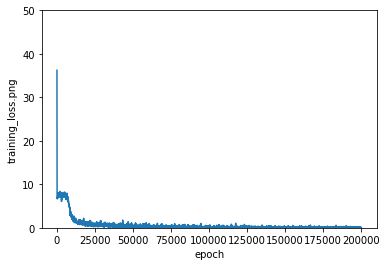

In [22]:
#plt wuth training loss
plt.figure()
plt.plot(training_loss_epoch, training_loss)
plt.xlabel('epoch')
plt.ylabel('training_loss.png')
axes = plt.gca()
axes.set_ylim([0,50])
plt.savefig('D:/magistratura/magistratura/MO/lab4/output_images/' + 'training_loss.png')

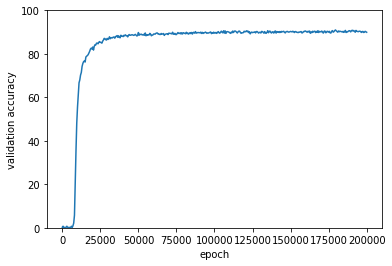

In [23]:
#plt wuth validation accuracy
plt.figure()
plt.plot(valid_accuracy_epoch, valid_accuracy)
plt.xlabel('epoch')
plt.ylabel('validation accuracy')
axes = plt.gca()
axes.set_ylim([0,100])
plt.savefig('D:/magistratura/magistratura/MO/lab4/output_images/' + 'valid_acc.png')

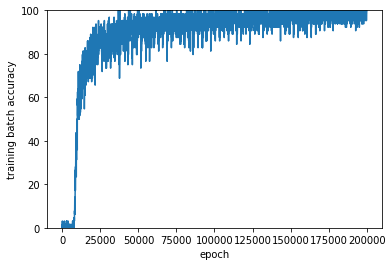

In [24]:
#plt wuth training accuracy
plt.figure()
plt.plot(train_accuracy_epoch, train_accuracy)
plt.xlabel('epoch')
plt.ylabel('training batch accuracy')
axes = plt.gca()
axes.set_ylim([0,100])
plt.savefig('D:/magistratura/magistratura/MO/lab4/output_images/' + 'training_acc.png')

D:\Users\userr\anaconda3\envs\py365\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


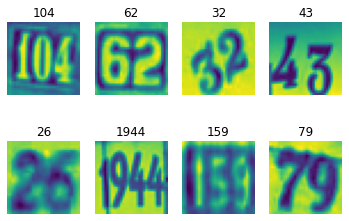

In [32]:
#random test predictions
for image_num in range(100):
    items = random.sample(range(test_data.shape[0]), 8)
    for i, item in enumerate(items):
        plt.subplot(2, 4, i + 1)
        plt.axis('off')
        plt.title(test_predictions[item][1:])
        plt.imshow(test_data[item, :, :, 0])
    plt.savefig('D:/magistratura/magistratura/MO/lab4/output_images/' + 'predictions' + str(image_num + 1) + '.png')

In [27]:
#test accuracy
print('Test accuracy: %.1f%%' % test_accuracy)

Test accuracy: 89.6%
